# Fundamentals of Data Analysis Project

<img src = "https://pandas.pydata.org/_static/pandas_logo.png" alt ="pandas_logo" height= "100" align="right"/>
<img src = "https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png?v=0.9.0" alt = "seaborn" width ="150" align="left"/>
<img src ="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt ="Jupyter logo" width="150" align="center"/>

<a id="toc"></a>

# Table of contents
- [Project Overview](#overview)   
- [About this notebook](#notebook)
    - [Project plan](#plan)
    - [Jupyter Notebook](#notebook)
    - [Python Libraries](#libraries)
    - [Downloading and running the code](#running)
- [Part 1: Describe the tips dataset using descriptive Statistics and plots](#part1)
    - [The tips dataset](#tipsdataset)  
    - [Loading / Reading in the dataset](#loading)    
    - [Exploring the dataset](#exploring)  
    - [Summary Statistics](#statistics)  
    - [Visualising the dataset using plots](#visualise)
    - [Summary of Part 1](#part1recap)
- [Part 2 Regression: Discuss and analyse whether there is a relationship between the total bill and tip amount.](#part2)
- [Part 3 Analyse: Analyse the relationships between the variables within the dataset](#part3)
- [References](#references)  

***

<a id="overview"></a>
# Project Overview

This project concerns the well-known tips dataset and the Python packages **seaborn** and **jupyter**. 
The project is broken into three parts, as follows.

1. Description: Descriptive Statistics and plots to describe the tips dataset.
This sections provides a summary of the tips dataset using summary statistics and plots.

2. Regression: Is there a relationship between the total bill and tip amount?
This sections discusses and analyses the relationship, if any between the total bill amount and tip together with an explantion of the analysis.

3. Analyse: Look at relationship between the variables within the dataset.
Where section 2 looks at the relationship between total bill amount and the tip amount, this section investigate what relationships exist between all of the variables with interesting relationships highlighted and discussed. 
***

***
# About this notebook and python libraries used in it.
<a id="notebook"></a>

This project was developed using the [pandas](https://pandas.pydata.org),  [seaborn](https://seaborn.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) packages as per the project requirements. These packages are imported using the conventionally used aliases of `pd`, `sns` and`plt` as well NumPy imported as `np`. 

[Seaborn](https://seaborn.pydata.org) is a Python data visualization library for making attractive and informative statistical graphics in Python. It has a dedicated website <https://seaborn.pydata.org> which I will be referring to throughout this project. Seaborn's strength is in [visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html#visualizing-statistical-relationships) and showing how variables in a dataset relate to each other and also how these relationships may depend on other variables. 
>Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.
 
According to the [introduction to seaborn](https://seaborn.pydata.org/introduction.html#an-introduction-to-seaborn) on this website, seaborn is built on top of matplotlib and closely integrated with pandas data structures and offers a 'dataset-oriented API for examining relationships between multiple variables, specialized support for using categorical variables to show observations or aggregate statistics ... automatic estimation and plotting of linear regression models for different kinds dependent variables. Seaborn aims to make visualization a central part of exploring and understanding data'.
This makes it ideal for a project such as this one.

[pandas](https://pandas.pydata.org/index.html) provides data analysis tools and is designed for working with data that is in a tabular format containing an ordered collection of columns where each column can have a different value type. This makes it ideal for exploring the Tips dataset which contains several numerical columns and several categorical columns in tabular format. The [getting started](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) section of the pandas documents has a comprehensive user guide which I will be referring to also throughout this project.
  
[jupyter](https://jupyter.org) notebooks allow you to create and share documents containing live code, equations, visualistion and narrative text. It is suitable data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.


***
# Part 1: Describe the tips dataset using descriptive Statistics and plots

The goal for part 1 is to provide a good summary of the tips dataset using statistics and plots. This is considered exploratory data analysis (EDA) which is where you explore the dataset considering various questions and visualising the results. According to [Experimental Design and Analysis](http://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf) by Howard J. Seltman any method of looking at data without formal statistical models and inference could be considered as exploratory data analysis. EDA is used for detecting errors, checking assumptions, determining relationships among explanatory variables, assessing the direction and rough size of relationships between explanatory and outcome variables and the preliminary selection of appropriate models of the relationship between an outcome variable and one or more explanatory variables.

[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 
Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. Tukey promoted the use of five number summary of numerical data including the maximum and minimum values (the extremes), the median and the quartiles (which unlike the mean and standard deviations are functions of the empirical distribution and are defined for all distributions). The quartiles and median are considered more robust to skewed distributions than the mean and standard deviation.


<a id="tipsdataset"></a>
***
## The Tips dataset

The *Tips* dataset is available in the [seaborn-data repository](https://github.com/mwaskom/seaborn-data) belonging to Michael Waskom - the creator of the [seaborn](https://seaborn.pydata.org/index.html) python data visualisation package. 
It is one of the example datasets built into the **seaborn** package and is used in the documentation of the `seaborn` package and can be easily loaded using the seaborn `load_dataset` command. The [tips csv file](http://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv) is also available at the [Rdatasets website](https://vincentarelbundock.github.io/Rdatasets/) which is a large collection of datasets originally distributed alongside the statistical software environment R and some of its add-on packages for teaching and statistical software development purposes maintained by [Vincent Arel-Bundock](http://arelbundock.com).

According to the [introduction to seaborn](https://seaborn.pydata.org/introduction.html#an-introduction-to-seaborn) many of it's examples use the *boring* Tips dataset which is considered a "very boring but quite useful for demonstration". The tips dataset illustrates the “tidy” approach to organizing a dataset. [Tidy data](https://en.wikipedia.org/wiki/Tidy_data) is an alternate name for the common statistical form called a model matrix or data matrix which is a
>A standard method of displaying a multivariate set of data is in the form of a data matrix in which rows correspond to sample individuals and columns to variables, so that the entry in the ith row and jth column gives the value of the jth variate as measured or observed on the ith individual.

Hadley Wickham of RStudio [2] defined 'Tidy Data' as *a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types.* In tidy data each variable forms a column, each observation forms a row and each type of observational unit forms a table. The Tips dataset does follow the tidy dataset format which I will show below.

According to the [tips dataset documentation](http://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html), the **Tips** dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. 
In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).[1]  The waiter collected several variables: The **tip** in dollars, the **bill** in dollars, the **sex** of the bill payer, whether there were **smokers** in the party, the **day** of the week, the **time** of day and the **size** of the party.

There is no further information on the makeup of the party apart from the sex of the bill payer and whether there was a smoker in the party. For instance the mix of males and females in a party is not defined or whether there was more than one smoker in a party, if the bill includes alcoholic drinks or not. While some relationships and trends between the variables might be shown below I think it is important to note that this is a very small dataset containing data for a single waiter in a single restaurant over a few months and therefore it can not be used to draw conclusions about tipping practices in general. 


***
 

### Loading the Tips data file into Python
<a id="loading"></a>

The tips dataset is available as described above in csv format (comma separated values) at the two urls : 
- Vincent Arel-Bundock's [Rdatasets website](https://vincentarelbundock.github.io/Rdatasets/) at <http://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv> 
- The [seaborn-data repository](https://github.com/mwaskom/seaborn-data) at <https://github.com/mwaskom/seaborn-data/blob/master/tips.csv>. Here the csv data is actually displayed nicely to the screen in tabular format - to get a link for the raw csv file click the `raw` icon which dumps the raw csv file to the browser from where you can copy the url <https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv>.   
  
`pandas` has several functions for reading tabular data into a DataFrame object. Data that is in csv format can be read into a pandas **DataFrame** object either from a csv file or from a URL using the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table) function. A pandas DataFrame is a 2 dimensional data structure with rows and columns that resembles a spreadsheet. The `pandas.read_csv()` function performs type inferrence to infer the type of data types in each column. A DataFrame can have mixed data types such as numeric, integer, string, boolean etc but each column will have only one data type. There are many [parsing options](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#parsing-options) when reading in csv files using the pandas `read_csv` function.

The Tips dataset is a small dataset so the entire csv file can be read into python in one go without causing any problems.
For larger datasets you could specify how many lines to read in using the `nrows` argument. You can also preview the file before reading it in using some shell commands but this is not necessary here. This dataset is straighforward to read in to pandas. I am using the csv data from the [seaborn-data repository](https://github.com/mwaskom/seaborn-data) mentioned earlier. (The csv file at the [Rdatasets website](https://vincentarelbundock.github.io/Rdatasets/) has an extra column added to it which looks like an index starting from 1 and this could be treated as the row index by setting the `index_col` argument to be the first column of the csv file `index_col =0` or alternatively this column could be dropped by setting the `usecols` to return a subset of  the columns, for example: `usecols=[1,2,3,4,5,6,7])`.)
***

### First importing Python Libraries

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


#### Read in the csv file

In [46]:
import pandas as pd  # import pandas library

csv_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

## creata a DataFrame named df from reading in the csv file from a URL
df =  pd.read_csv(csv_url)  ## creata a DataFrame named df from reading in the csv file from a URL

#### Check the DataFrame looks ok

Having successfully read in the csv file into a pandas DataFrame object, panda's `head` and `tail` functions can be used to ensure the file has been read in and looks ok before exploring the DataFrame further below. As it is a very small file it can be quickly checked against the csv file source to check that everything looks ok. `tail()` is particularly useful for making sure a csv file has been read in properly as any problems usually manifest towards the end of the dataframe, throwing out the last number of rows but all looks well here.

In [3]:
print("The first few rows in the dataset: \n\n", df.head(3))  # look at the top 5 rows of the DataFrame df
print('\n The final few rows in the dataset \n',df.tail(3)) # Look at the bottom 5 rows of the DataFrame

The first few rows in the dataset: 

    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

 The final few rows in the dataset 
      total_bill   tip     sex smoker   day    time  size
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


## Exploring the data.

Again referring to Howard Seltman's book, data from an experiment are generally collected into a rectangular array mosy commonly with one row per experimental subject and one column for each subject identifier, outcome variable and explanatory variable. The Tips dataset follows this principle. Each of the columns have either numeric values for a particular quantitative variable or the levels for a categorical variable.

#### Tidy data principles

As mentioned above, the `tips` dataset illustrates the "tidy" approach to organising a dataset.
The tips csv dataset has been imported into a pandas DataFrame object. Each column contains one variable and there are 244 rows in the dataFrame with one row for each of the 244 observations. 


<a id="exploring"></a>
### Viewing the tips data

Having read in the dataset using pandas `read_csv()`, the dataset can be explored using pandas and seaborn packages which work well together for analysing datasets such as this one. Pandas has many useful functions for looking at the dataframe object created from reading in the csv file which can be sliced and diced in many ways. Summary statistics are very easily generated with pandas. While the pandas package can be used to plot the data, this is where the seaborn package shines.

#### Column and row names
When the 'tips' csv dataset was read in, the column names were assigned using the first line of data in the csv file which is the default treatment with `pandas.read_csv()` if you have not set a header row or provided column names. You can however provide different column names by setting `header=None` in the `read_csv` function and then providing the names to use using the `names` argument, for example `names= 'col-name1', 'col-name2'` etc.

In [4]:
print("The index of the tips DataFrame: ", df.index) # the index or row labels of the DataFrame

The index of the tips DataFrame:  RangeIndex(start=0, stop=244, step=1)


There are 7 columns as expected and an index that begins at 0 for the first row. If the index of a DataFrame is not set to a particular column or some other value using `index_col` argument to `read_csv` , it will default to a sequence of integers beginning at 0 which is fine for the Tips dataset. The index goes from 0 (for the first row) up to 243 for the last row or observation in the dataset. The index is a range of integers from 0 up to but not including 244. 



#### dtypes

The [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#dtypes) (data types) have been inferred by `read_csv` but it is also possible to pass the data type when reading in the file. 

In [4]:
print("The dtypes in the dataframe are:", end='\n\n')
print(df.dtypes) # the data types attributes for each column in df
# df.dtypes.value_counts() # how many variables of each type in the dataset 

The dtypes in the dataframe are:

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


The `dtypes` show that there are three numerical columns and 4 non-numerical object columns. 
The variables `total_bill` and `tip` are floats representing US dollar amounts while `size` is an integer representing the number of people in the party. The remaining columns have been read in as objects. Pandas uses the `object` dtype for storing strings, other arbitary objects or when there are mixed types in a column.

`smoker` is a binary categorical variable with two values `yes` or `no`. `sex` is also binary categorical variable with two values `Male` and `Female`. The 'day' and 'time' variables in this dataset could also be seen as categorical variables here as they have a limited number of distinct possible values. The `time` column here is not an actual time but instead just a binary categorical variable with two possible values `dinner` and `lunch` while day has four possible values: `Thur`, `Fri`, `Sat` and `Sun` for Thursday, Friday, Saturday and Sunday.

When a string variable consists of only a few values, converting such string variables to [categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical-data) variable will actually save some memory. Specifying `dtype='category'` will result in an unordered Categorical whose categories are the unique values observed in the data. You can also use the `astype` on the dataframe to convert a dtype in a dataframe.

[](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical-data)

#### converting variables to type category

In [47]:
df['sex']=df['sex'].astype('category') # convert sex to be a categorical value
df['smoker']=df['smoker'].astype('category') # convery smoker to be a categorical value
df['day']=df['day'].astype('category') 
df['time']=df['time'].astype('category') 
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

#### Checking for missing or N/A values
Next checking to see if there are any missing values or NA's in the dataset using `isna()`function and summing up the True or False boolean values to get a count of any missing values which in this case is zero as there are no missing or na values.

In [7]:
# checking if there are any missing values, using * to save printing space
print(*df.isna().any()) # isna returns boolean values 0 or 1, sum them to get count of NA's

False False False False False False False


### Sorting by values
While the `head` and `tail` functions show the top and bottom rows of a dataset as read in from the data source, the values may not be sorted. The `sort_values` function can be used to sort the dataframe in ascending or descending order by one or more variables to get an idea of the range of values in the dataset.

In [8]:
df.sort_values(by='tip').head() # sort by tip size and look at top 5 tip sizes
df.sort_values(by='total_bill', ascending = False).head() # sort by total bill amount and then look at top 5 amounts

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [9]:
df.head() # look at the first 5 rows of the dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Describing the Tips Dataset using statistics.

Exploratory data analysis generally involves both non-graphical methods which include calculation of summary statistics and graphical methods which summarises the data in a picture or a plot. These methods can be univariate where one variable is looked at at a time or multivariate where two or more variables are looked at together to explore relationships.
Seltman recommends performing univariate EDA on each of the components before going on to do multivariate EDA.
The actual EDA performed depends on the role and type of each variable. I will first look at the summary statistics of the categorical variables and then the numerical variables.
For categorical variables the range of values and the frequency or relative frequency of values are of interest with the fraction of data that fall into each category.

### Univariate non-graphical exploratory data analysis of Tips dataset.


#### Characteristics of Categorical variables in the Tips dataset
Panda's `describe` function can be used to look at categorical or object type data and present it in a table.
For object data it include the `count`(the number of non-null observations), `unique`, `top` (the most common value) and the `freq`uency of the most common value.

In [10]:
# use pandas describe for the categorical variables in the dataframe
print("Table of characteristics of the categorical variables in the Tips dataset:\n")
df.describe(include=['category'])

Table of characteristics of the categorical variables in the Tips dataset:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


The total count of variables is 244 so there are no missing observations.

- Sex: There are 157 male bill payers out of 244 observations leaving only 87 female bill-payers.

- Smoker: There a more non-smokers in the dataset with 151 out of the total of 244 observations having only non-smokers in the party while 93 parties include smokers.

- Time: The data includes 176 dinners out of 244 meals wuth the remaining 68 meals being lunches.

- Day: Saturday is the most frequent day in this dataset.

### Characteristics of Quantitative variables in the Tips dataset

> Univariate EDA for a quantitative variable is a way to make preliminary assessents about the population distribution of the variable using the data of the observed sample.
 
When looking at quantitative variables the characteristics of interest are the centre, spread, modality (the number of peaks in the pdf), the shape of the distribution and the outliers. 

(The observed data generally represents just one sample out of many possible samples. 
This Tips dataset could be considered as just one sample of measurements out of many possible samples and the values would be different if a different sample was taken by a different waiter maybe or in a different timeframe. The sample statistics below would then be estimates of the corresponding population parameters.)

Pandas [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas-dataframe-describe) function generates statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. (excluding NaN values). It summarise and describe the numerical variables of the dataframe by including the count, mean, standard deviation, minimum and maximum values, median and the 25th and 75th percentiles.  These statistics can also be obtained using the various statistics functions such as `mean`, `sd`, `min`, `max` etc. The only numerical variables in this dataset are the `total_bill` amount in dollars, the `tip` amount in dollars and `size` for the number of people in a party. (These are really just sample statistics). 

The **central tendency** or location of the data distribution is determined by the typical or middle values. The arithmetic mean is the sum of all the data values divided by the number of values. While the mean value is the average value in the dataset it may not be typical of the values in the dataset if there are very small or very large values in the dataset. The median is another measure of central tendancy - it is the middle value after all the values are put in an ordered list.
The mean and median coincide for symmetric distributions whereas for unimodal skewed distributions the mean will be more in the direction of the long tail of the distribution. 
The median can be considered a more typical value in the dataset or closer to some of the typical values.  The median is also considered robust which means that the moving some of the data will not tend to change the value of the median. A few extreme values will not affect the median as they would affect the mean. 

There are several statistics that are used to show the spread of the distribution of the data which concerns how far away from the centre the data points are located. The variance is a measure of spread which involves calculating the distance (deviation) from the mean for all the data point, squaring each number (to deal with negative deviations)and summing it up before being   divided by the number of data points (or n-1 for a sample variance). The variance is the average of the squared deviations of each observation from the centre or mean of the data. Bigger deviations will make a bigger variance. The resulting variance figure will be in squared units of the original units. The standard deviation is the square root of the variance and is in the same units as the data and therefore can be more easily interpreted. The `describe` function shows the standard deviation rather than the variance but the variance can be found using the `var` function.
The range of values in the data is shown by the minimum and maximum values and is not considered a robust measure of spread but it is useful for showing possible errors or outliers. The other measure of spread is determined by the percentiles or quartiles of the values. Panda `describe` included the 25%, 50% and 75% quartiles although you can specify which quartiles to include or not. These three values divide the data into quarters. 
The 25% percentiles is the first quartile and one quarter of the values fall below this. The 50% percentile is the median value where half of the data falls below it and half above it. The 75% percentiles is the 3rd quartile where $\frac{3}{4}$ of the data points fall below it and one quarter above it. These figures are used to calculate the **Interquartile range (IQR)** which is calculated by taking the 75% percentile or 3rd quartile (Q3) minus the 25% percentile or first quartile (Q1). $$IQR = Q3 - Q1$$
Therefore half of the values are captured by the IQR which are the middle values of the data. Data that is more spread out will have a higher IQR. IQR is considered a more robust measure of spread than the variance and standard deviation. `describe` function does not show the IQR value itself but it can be calculated by taking the 25% from the 75% values returned. It will be more clearly shown in the boxplots further down.

The skewness of the data is another way of describing data and is a measure of assymetry. This will be shown it the plots.


### Summary statistics of the data.

In [11]:
pd.DataFrame.describe #<function pandas.core.generic.NDFrame.describe(self, percentiles=None, include=None, exclude=None)>

# get summary statistics of the numerical values, 
df.describe() # get statistics summary of the tips dataframe df

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Central Tendency statistics of the Tips data

In [12]:
print("The mean bill amount is $%.3f" %df['total_bill'].mean(),"while the median bill amount is $%.3f" %df['total_bill'].quantile(q=0.5))


The mean bill amount is $19.786 while the median bill amount is $17.795


In [13]:
print("The mean tip amount is $%.3f" %df['tip'].mean(),"while the median tip is $%.3f" %df['tip'].quantile(q=0.5))


The mean tip amount is $2.998 while the median tip is $2.900


The median bill amount is lower than the mean bill amount by approximately 2 dollars.
The median tip amounts is lower than the mean tip by 10 cents.
When the median value is smaller than the mean value it indicates thats the distribution is not symetrical. 

### Spread statistics of the Tips data

#### Standard deviation and variance

In [14]:
# the standard deviation
df.std()

total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64

In [15]:
# the standard deviation is the square root of the variance
df.var()

total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64

In [16]:
print("The standard deviation of the bill amount is $%.3f" %df['total_bill'].std())
print("The standard deviation of the tip is $%.3f" %df['tip'].std())

The standard deviation of the bill amount is $8.902
The standard deviation of the tip is $1.384


The standard deviation for total bill is quite high at almost 9 dollars but when the size of the party is taken into account this may not seem as large. (I will add a variable that shows the total bill per person).


#### The range of the data

In [17]:
print("The minimum bill amount is $",df['total_bill'].min()," while the maximum bill amount is $", df['total_bill'].max(), " giving range of ",df['total_bill'].max() - df['total_bill'].min())
print("The minimum tip amount is $",df['tip'].min()," while the maximum tip amount is $", df['tip'].max(), "giving a range of ",df['tip'].max() - df['tip'].min())
print("The number of people in each dining party varies from",df['size'].min(),"to",df['size'].max(), "people" )

The minimum bill amount is $ 3.07  while the maximum bill amount is $ 50.81  giving range of  47.74
The minimum tip amount is $ 1.0  while the maximum tip amount is $ 10.0 giving a range of  9.0
The number of people in each dining party varies from 1 to 6 people


#### The Interquartile range

In [18]:
print("The median bill amount is ",df['total_bill'].quantile(q=0.5), "dollars and the median tip amount is", df['tip'].quantile(q=0.5),"dollars")

The median bill amount is  17.795 dollars and the median tip amount is 2.9 dollars


In [19]:

print("The total bill IQR is the range from %.2f dollars" % df['total_bill'].quantile(q=0.25), "to %.2f dollars" % df['total_bill'].quantile(q=0.75))
print("The tip IQR ranges from %.2f dollars" % df['tip'].quantile(q=0.25), "to %.2f dollars" %df['tip'].quantile(q=0.75))

The total bill IQR is the range from 13.35 dollars to 24.13 dollars
The tip IQR ranges from 2.00 dollars to 3.56 dollars


In [20]:
# seeing if using format strings will make this easier to print.
print(f"The tip IQR ranges from {df['tip'].quantile(q=0.25):.2f} to {df['tip'].quantile(q=0.75):.2f} dollars")

The tip IQR ranges from 2.00 to 3.56 dollars


The range of values for the bill amount is quite large varying between roughly 3 and 48 dollars while the tip amounts range from between 1 and 10 dollars. (The interquartile range is closer to the mean values. )

### Plots - Graphical EDA of the univariate data


*Note - some of this is moved up from a later section. Make sure to avoid duplication!*

While `pandas` functions were used above to look at a summary statistics of the dataset using statistics, the `seaborn` package will now be used to create some visualisations of the dataset that can be used to verify these summary statistics. `pandas` does have some basic plotting functionality built in from the `matplotlib` package. `seaborn` is built on top of`matplotlib` and closely integrated with `pandas` data structures.
 
Plots can highlight any obvious relationships between the different variables in the dataset. They can also be used to identify any groups of observations that are clearly separate to other groups of observations. There are many different ways to visualise this dataset using the seaborn library and no universal best way and many examples at <https://seaborn.pydata.org> .

#### Visualising the categorical variables in the Tips dataset


#### 
There are four categorical variables in the Tips dataset as seen above. These are `day`, `time`, `sex` and `smoker`. Here I will show the distribution of the categorical variables using a `countplot` which is a bit like a histogram but across a categorical instead of quantitative variable. A `countplots` can be used to show the number of occurences in each category of a variable. I will first look at the number of bill payers by day. The count is not the overall number of people in the restaurant but the number of bill payers. In addition to showing the count of a category, a `hue` semantic can be used to show the breakdown by the levels of a second variable.

`day_order` is created to store the order to show days on the plots.

##### Countplot of Tables served by Day.

In [21]:
df.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


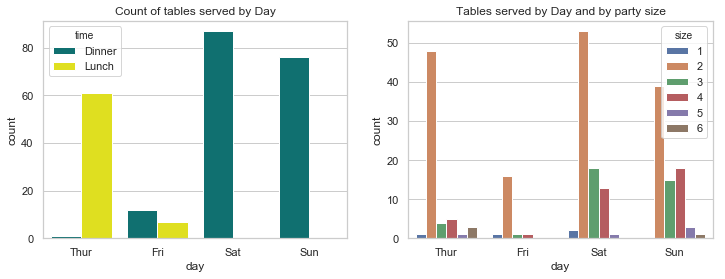

In [4]:
# countplot showing the count of total_bill 
sns.set(style="whitegrid")

f, axes = plt.subplots(1, 2, figsize=(12, 4)) # set up 1 by 2 plot and figure size 12 by 4
# create a variable to store the order of days to show on the plots
day_order=["Thur", "Fri", "Sat","Sun"] # the order to be shown on the plot

# plot number of tables per day, added in time too
sns.countplot(x ="day",data =df, hue="time", palette=["teal","yellow"], order=day_order, ax=axes[0])
axes[0].set_title("Count of tables served by Day")

# plot number of  tables per day by size of party
sns.countplot(x =("day"), hue="size",data =df, ax=axes[1], order=day_order)
axes[1].set_title("Tables served by Day and by party size")
plt.show() # hide the matplotlib axes text

- Fridays are the quietest days for this waiter. Saturdays are the busiest days followed by Sundays so there are more customers at the weekend. 
- The mosy common party size by far is 2. There are very few lone diners and very few parties of  5 and 6.

In [ ]:
pal = dict(Lunch="seagreen", Dinner="gray")

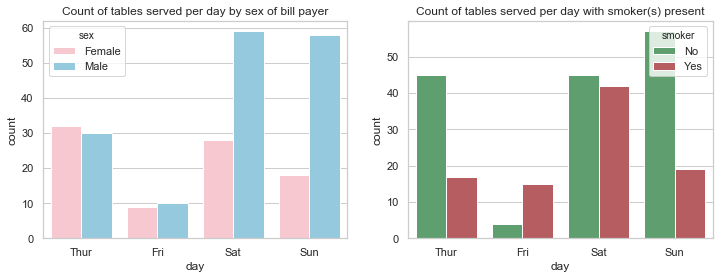

In [5]:
# countplots by gender of bill payer and by smoker in the group
sns.set(style="whitegrid")

f, axes = plt.subplots(1, 2, figsize=(12, 4)) # set up 1 by 2 plot and figure size 12 by 4
order=["Thur", "Fri", "Sat","Sun"] # the order to be shown on the plot

# create a dictionary mapping hue level to colors (as per the FacetGrid plot!)
gender_pal=dict(Female="pink",Male="skyblue")
smoker_pal=dict(Yes="r",No="g")
# plot number of tables per day, use the palette as per the dict pal. specify the order of days on the axes.
sns.countplot(x ="day", hue="sex", palette=gender_pal,data =df, order=order, ax=axes[0])
axes[0].set_title("Count of tables served per day by sex of bill payer")

# plot number of  tables per day by size of party
sns.countplot(x =("day"), hue="smoker",data =df, ax=axes[1], palette=smoker_pal, order=day_order)
axes[1].set_title("Count of tables served per day with smoker(s) present")
plt.show() # hide the matplotlib axes text



- There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend. (maybe more first dates or just more men out entertaining at the weekends!)
- There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded for Fridays than any other days, these customers are mostly smokers. (perhaps after work?!).
- There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.

Of course this dataset is just for one waiter who may work less hours on a Friday?


#### Histogram and Kernel Density estimate plots of Total bill and Tip amount.
A histogram is a plot that shows the distribution of a single quantitative variable such as the total bill amount or the tip amount. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. 
It charts the data using adjacent rectangular bars and displays either the frequency or relative frequency of the measurements for a range of values in each interval. Each interval or range of values is a *bin*. The number of bins can be specified although seaborn and matplotlib will automatically choose this. The number of bins chosen usually depends on the amount of data and the shape of the distribution. `distplot()` uses a simple rule to make a good guess for what the right number is by default, but this can be changed which might reveal other features of the data.

The histogram visualises the centre and spread of the distribution as well as showing if there is any skew in the data. Below are the histograms of the Tip amount and the total bill amounts. The mean is shown as the red line and the median as the green dashed line.
For symmetric distributions the mean is at the centre of the distribution and coincides with the median. Where the distribution is skewed the mean is further over than the median to the long tail which can be seen below for the total bill amount.


The mode is the most frequently occuring value in a distribution. There is no mode function in pandas or even numpy. It is not really used as such except for describing whether a distribution is unimodal, bimodal or multimodal which depends on how many peaks there is in the distribution. In multimodal distributions there is no unique highest mode. 

Seaborn's `distplot()` function draws a histogram and fit a kernel density estimate (KDE).

The kernel density estimate can be a useful tool for plotting the shape of a distribution. It also represents the density of observations on one axis with height along the other axis but involves further calculations where each observation is replaced with a normal gaussian curve centred at that value, these curves are then summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1.
A kernel density plot can also be drawn using the `kdeplot` function and with this you can specify a *bandwidth* (bw) parameter which controls how tightly the estimation is fit to the data. 

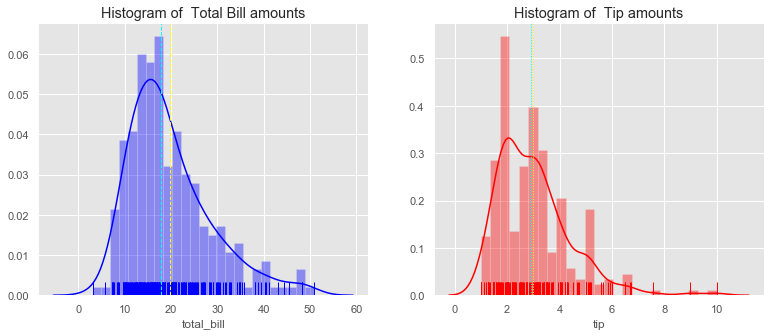

In [212]:
f, axes = plt.subplots(1, 2, figsize=(13, 5))

# plot the histograms of total bill amounts
sns.distplot(df['total_bill'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
# add a vertical line at the mean
axes[0].axvline(df['total_bill'].mean(), color='yellow', linewidth=1, linestyle="--")
# add a vertical line at the median
axes[0].axvline(df['total_bill'].quantile(q=0.5), color='cyan', linewidth=1, linestyle="--")
# add a title
axes[0].set_title("Histogram of  Total Bill amounts")


#plot the histogram of tips
sns.distplot(df['tip'], kde=True, rug=True, ax=axes[1], color="red", bins=25)
# add a vertical line to show the mean
axes[1].axvline(df['tip'].mean(), color='yellow', linewidth=1, linestyle=":")
# add a vertical line to show the median
axes[1].axvline(df['tip'].quantile(q=0.5), color='cyan', linewidth=1, linestyle=":")
# add title
axes[1].set_title("Histogram of  Tip amounts")
plt.show() # to avoid the text

The histograms show that most total bill amounts fall in the range between 10 and 30 dollars with a peak around 16 dollars. It has only one peak when the default number of bins is used. As more bins are used you would expect to see more peaks in the distribution.
The mean is the light yellow line and the median is the broken blue line. As the summary statistics above showed the median total total bill is about 2 dollars less than the mean indicating a non-symmetrical distribution. The mean and median tip amount are very close to each other.
The distributions here do look slightly right skewed but you would expect not to see values near zero anyway for total bill amounts.
The tips histograms shows that most tips fall in the range between 2 and 4 dollars with two distinct peaks at about 2.50 and 3.50.

#### Boxplots of Total Bill amounts and Tip amounts

Boxplots can be used to show the central tendency, symmetry and skew of the data and any outliers.
The rectangular box is bounded by the 'hinges'  representing the lower (1st quartile) and upper (3rd quartile) while the line drawn through the box represents the median. The whiskers are the lines that extend out from the box in both directions and are drawn to the point that is 1.5 times the IQR. Outliers are any points that are outside of the whiskers. The whiskers represent the minimum and maximum values of the data excluding the outliers.
The boxplots show if the data is symmetric or not  - if the median is in the centre of the box and the whiskers are the same length. A skewed distribution has the median nearer to the shorter whisker. A positively skewed or right skewed distribution has a longer top whisker than bottom whisker whereas a negatively skewed or left skewed distribution has a longer lower whisker.

Boxplots use robust median and IQR statistics instead of the more sensitive mean and standard deviations. 


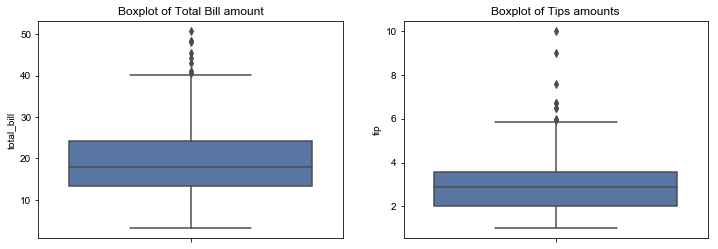

In [23]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="darkgrid") # change the background to a darkgrid
sns.boxplot(y=df['total_bill'], ax=axes[0])
# add a title
axes[0].set_title("Boxplot of Total Bill amount")
sns.boxplot(y=df['tip'], ax=axes[1])
axes[1].set_title("Boxplot of Tips amounts")
plt.show()

The boxplots above shows similar information on the distribution of total bill and tip amounts as the distribution plots above. The rectangular boxes show the middle half of the distribution. The median bill amount is about 18 and the median tip amount is over 3 dollars. Total bills over 40 represent outliers while tips over 6 dollars are considered outliers.
Boxplots can be used to compare distributions, often for one variables at different levels of another variable. I will look at this more in section 3 but for now will just look at the number of bills by day and by sex. 


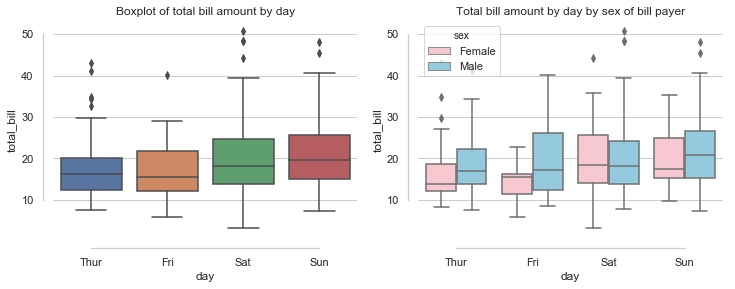

In [6]:
sns.set(style="whitegrid")

# set up 2 by 2 plots, overall figure size 12 by 4
f, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 4))

# bill amount by day, grouped by sex
sns.boxplot(x="day",y="total_bill" ,data=df, order=day_order, ax=axes[0]) # controlling the day or
# bill amount by sex, grouped by smoking status
axes[0].set_title("Boxplot of total bill amount by day")
sns.boxplot(x="day",y="total_bill" ,hue="sex",data=df, palette=gender_pal,order=day_order, ax=axes[1]) 
# bill amount by dining time, grouped by sex
axes[1].set_title("Total bill amount by day by sex of bill payer")
sns.despine(offset=10, trim=True) # remove the spines
plt.show() # get rid of text above plots

looking at the total bill amounts per day shows that the amount spent increases at the weekend and is lowest on a Friday. When broken down by the sex of the bill payer it seems that the median amount spent on the bill is higher for males than females and is also more variable for males. Saturday seems to be the only day when the median bills for males and females are similar although there is more of a right skew on the bill amounts by males. 

#### Adding additional variables



In [3]:
df['Tip%']=df['tip']/df['total_bill']*100
df['BillPP']=df['total_bill']/df['size']
df['TipPP']=df['tip']/df['size']
df['total_spent']=df['total_bill']+df['tip']
df.head()


,total_bill,tip,sex,smoker,day,time,size,Tip%,BillPP,TipPP,total_spent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,8.495000,0.505000,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,3.446667,0.553333,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,7.003333,1.166667,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,11.840000,1.655000,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,6.147500,0.902500,28.20


In [5]:
print(f"While the standard deviation of the total_bill amount was quite high at ${df['total_bill'].std():.2f}, the standard deviation of the bill per person seems more reasonable at ${df['BillPP'].std():.2f}")

print(f"This makes sense when the average (mean) bill per person is ${df['BillPP'].mean():.2f}.")
print(f"The tip amount as a percentage of the total bill amount is {df['Tip%'].mean():.2f} percent.\n")


While the standard deviation of the total_bill amount was quite high at $8.90, the standard deviation of the bill per person seems more reasonable at $2.91
This makes sense when the average (mean) bill per person is $7.89.
The tip amount as a percentage of the total bill amount is 16.08 percent.



The extra variables can now be plotted to see what their distribution looks like

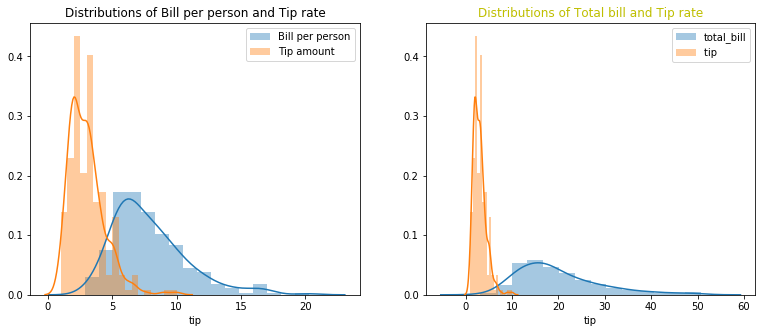

In [6]:
f, axes = plt.subplots(1, 2, figsize=(13, 5))

# plot the histograms of total bill amounts
sns.distplot(df['BillPP'], label="Bill per person", ax=axes[0])
sns.distplot(df['tip'], label = "Tip amount", ax=axes[0])
#sns.distplot(df['total_bill'], label="total_bill", color="g")
# add a title
axes[0].set_title("Distributions of Bill per person and Tip rate")
axes[0].legend()
sns.distplot(df['total_bill'], label = "total_bill", ax=axes[1])
sns.distplot(df['tip'],label = "tip ", ax=axes[1])
axes[1].set_title("Distributions of Total bill and Tip rate",color="y")
axes[1].legend()
plt.show()

#### Unique Tip amounts

In part 2 when looking at regression, I checked how many unique values of total bill and tip amount there are in the dataset. There are over 100 more unique bill amounts than unique tip amounts which suggests to me that maybe some rounding of tip amounts does occur such as to the nearest dollar so I think this is worth checking.
There seems to be no mode calculation in Numpy but there is one in the `scipy.stats` module. The mode is the most frequently occuring value. 
Following this I was curious to see how many times were the tips rounded to the nearest 50 cent or dollar and it turns out there are 111 rows in the dataset where the tip was rounded to the 50 cent or dollar for tip amounts between 1 and 5 dollars.

In [7]:
print(f"There are {len(df['total_bill'].unique())}  unique total bill amounts and {len(df['tip'].unique())}  unique tip amounts ")

# import stats module to use mode function
from scipy import stats
# Find the mode
mode= stats.mode(df['tip'])
print("The most common tip amount is ", *mode[0],"which occurs ", *mode[1],"times in the Tips dataset")
print(f"Tip of exactly 2 dollars occur {len(df[df.loc[:, 'tip'] ==2])} times") 
      
# use pandas isin function to check if the tip amounts are rounded
# create a set of tip values
values =[1.00,1.50, 2.00,2.50,3.00,3.50,4.00,4.50,5.00]
# get the count using len of how many tips fall into these range
print(f"For tips between 1 and 5 dollars there were {len(df[df['tip'].isin(values)])} rows where the tip was rounded to nearest 50 cent or dollar. \n")


There are 229  unique total bill amounts and 123  unique tip amounts 
The most common tip amount is  2.0 which occurs  33 times in the Tips dataset
Tip of exactly 2 dollars occur 33 times
For tips between 1 and 5 dollars there were 111 rows where the tip was rounded to nearest 50 cent or dollar. 



### Recap of part 1: Describe the Tips dataset

The object for part 1 was to describe the variables in the Tips dataset using statistics and some plots.
In this section I looked at some of the background to the Tips dataset, located and read the csv file into python and checked that all was in order. There was no data cleaning required as such.
Pandas functions were used to get a good overview of the dataset including looking at a selection of observations from the dataset. There are both categorical and quantitative variables in the dataset which determimed the kind of statistics and visualisations that are appropriate to apply.

For categorical variables this meant count of values in each category, number of unique values, the most commonly occuring values in each category and their frequency. Countplots looked at the distribution of the values across the different levels of each category.
For the quantitative variables (total bill amount, tip and size) the statistics that measured central tendancy and spread were used including the mean, median, standard deviation, range of values and interquartile range. Graphical EDA was then performed using a variety of Seaborn plots such as boxplots and the `distplot` function which incorporates  histograms and kernel density estimates. 

I gave an overview of what statistics actually tell about a dataset to which they are applied in general to show how they would be useful for the Tips dataset.

My main reference point so far was the Seaborn tutorial and the book Experimental Design and Analysis by [Howard J. Seltman](http://www.stat.cmu.edu/~hseltman/AboutMe.html) who taught data science and statistic courses at CMU, in particular a course called Experimental Design for Behavioral and Social Sciences. Seltman bundled his teaching materials into a free on-line textbook.

Following this guide the next step would be to do some multivariate non-graphical exploratory data analysis and then some graphical analysis. Cross tabulation is the basic non-graphical EDA technique where two way tables are constructed using the levels of one variable against the levels of another variable. It can also be used for more than two variables by cross tabulating two or more variables against each level of a third variable. 

Before going on to part 2 I will complete section 1 by a visualisation of the dataset that shows some pairwise relationships which summarises how the variables interact with each other. 

Part 2 looks more closely at the relationship between the total bill amount and the tip, if there is one. Further multivariate analysis using additional variables will be the focus of part 3 which will look at relationship between the variables within the dataset.


#### Summary plots of the Tips dataset

To finish up part 1 are some plots that summarise the dataset below. This will help identify the relationship between total bill and tip that is examined more closely in Part 2 and also some relationships between other variables in the dataset for part 3.

Seaborn's `pairplot` shows all pairwise relationships (for quantitative variables) in a dataset. It uses the `PairGrid()` to show multiple relationships between different pairings of the variables in a dataset.
The univariate distributions are shown across the diagonal and the relationship between pairs of variables are shown elsewhere.
The different levels of a categorical variables can be shown by colour using the hue semantic.
The plots below show the distributions of total_bill, tip and size variables on the diagonal. The bivariate relationships are shown as scatter plots. The different colours represent the sex of the bill payer in the first pairplot and the smoker status in the second pairplot below.




 Pairplot showing relationships between total bill, tip and size by sex of bill payer 



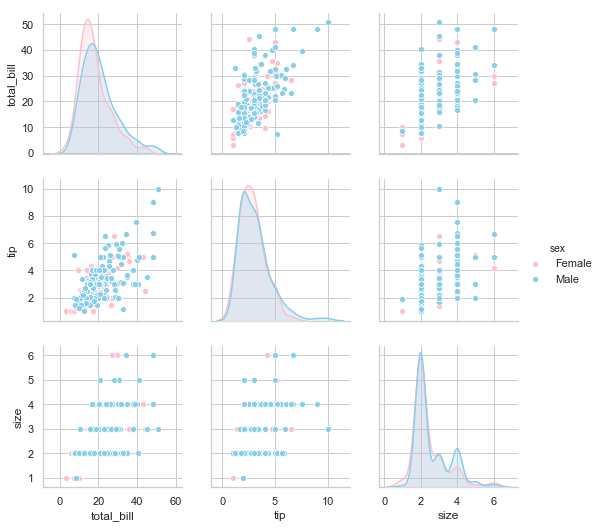

In [47]:
print("\n\n Pairplot showing relationships between total bill, tip and size by sex of bill payer \n")
# plot the pairplot using palette defined earlier for hue levels
sns.pairplot(df, hue="sex",  palette= gender_pal)
# Add title. 
#plt.suptitle("Pairplot showing relationships between total bill, tip and size by sex of bill payer")
plt.show()



 Pairplot showing relationships between total bill, tip and size by smoker in the party 



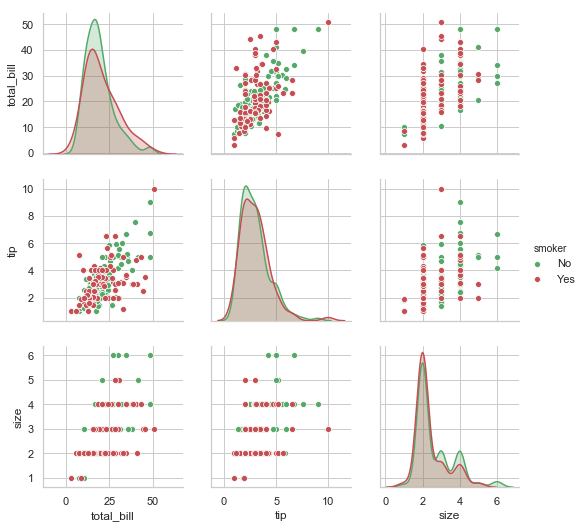

In [48]:
print("\n\n Pairplot showing relationships between total bill, tip and size by smoker in the party \n")
sns.pairplot(df, hue="smoker",  palette= smoker_pal)
#plt.suptitle("Pairplot showing relationships between total bill, tip and size by smoker in the party")
plt.show()

The pairplots below show the relationships between each of the variables total bill, size, sex and smoker individually conditioned on the day of the week to give some insight into the factors that may (or may not) influence the tip amount. The colours of the dots correspond to each of the 4 days.


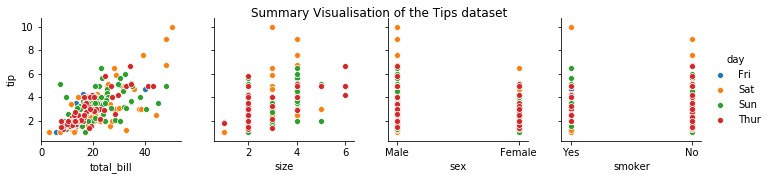

In [8]:
g = sns.pairplot(df, x_vars=["total_bill", "size","sex","smoker"],y_vars=["tip"], hue="day")
plt.suptitle("Summary Visualisation of the Tips dataset")
plt.show()

Below is a similar visualisation using the percentage tip instead of the tip amount.

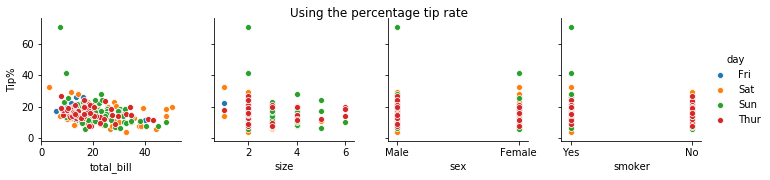

In [9]:

g = sns.pairplot(df, x_vars=["total_bill", "size","sex","smoker"],y_vars=["Tip%"], hue="day")
plt.suptitle("Using the percentage tip rate");plt.show()

The visualisation above shows how tip size varies by the different variables.
- Tip amount in general does rise with the amount of the total bill as expected. 
- The highest tips are on Saturdays. There are two outliers where the tip values is high relative to the bill amount on a Sunday. 
- Tip amount does appear to rise with the number of people in the party. Friday diners were mostly couples or pairs. -  - There were more smokers on Fridays than any other day.
- Total bills and tip amounts do rise together with the size of the group as expected. However there is a slight dip in tip amount relative to the bill amount for groups of 5. There are only 4 parties of 5 though so we can't read much into this!.
- Total bill and tips are slightly higher on Saturdays than Sundays but relative to the total bill amount the Saturday diners were more generous tippers.
-  The percentage tip seems to be fairly constant across the range of total bill amounts, although it dies seem to fall a bit towards the higher total bill amounts. 

# Part 2 Regression: Discuss and analyse whether there is a relationship between the total bill and tip amount.
In this section I will look at the relationship between the total bill and the tip amount using regression. My primary references are lecture notes and chapter 9 of Experiment Design and Analysis by Howard J Seltman on [Simple Linear Regression](http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf) and also a [hacker earth blog post on regression analysis](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/). 
The pairplots just above indicate that there is indeed a relationship between total bill and tip amount and how this might be influenced by other variables such as the size of the party, sex of the bill payer, daya of week and smoker.
In this section I will focus on the nature of the relationship between the total bill and the tip amount but also taking into account the other factors at play. I will start by looking at statistical methods for measuring nature and strength of the relationship, look at some of the theory behind what exactly linear regression is and then the focus will be on using the seaborn library to visualise the relationships. 

#### Correlation and Covariance of Total Bill and Tip amounts
For two quantitative variables such as the total bill amount and the tip amount, the covariance and correlation are statistics of interest. The correlation is a statistical method used to determine whether a linear relationship between variables exists and shows if one variable tends to occur with large or small values of another variable.

The covariance is a measure of how much two variables vary with each other and shows how much and in what direction one variable will change when another one does. If a covariance is positive then when one measurement is above it's mean then the other measurement will more than likely be above it's mean and vice versa while with  a negative covariance when one variable is above the mean the other measurement is likely to be below it's mean. A zero covariance implies that the two variables vary independently of each other. 

The correlation statistics are computed from pairs of arguments. The correlation of the measurements can be got using the pandas `corr` method on the dataframe. If there is a strong positive relationship between the variables, the value of the correlation coefficient will be close to 1, while a strong negative relationship will have a correlation coefficient close to -1. A value close to zero would indicate that there is no relationship between the variables.

The correlation is easier to interpret than the covariance. 
Correlation does not depend on units of measurement and does not depend on which variable is x or y. $r$ is the symbol used for sample correlation and $\rho$ is the symbol for the population correlation.

#### Correlation and Covariance statistics for Total bill and Tip amount.

Using the `corr` function on the tips dataframe will include a correlation statistic for the Total Bill against Tip. Size is also included (number of people in a dining party).

In [27]:
# just to review the dataset
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,Tip%,BillPP,TipPP,total_spent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,8.495000,0.505000,18.0
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,3.446667,0.553333,12.0


In [42]:
# calculating correlation on the numerical variables of Tips dataset
# subset columns to exclude new columns
print("The correlations between the numerical variables in the Tips datasets are: \n" ,df.loc[:,'total_bill':'size'].corr())
print("\n The correlations between the numerical variables in the Tips datasets are: \n" ,df.loc[:,'total_bill':'size'].cov())

The correlations between the numerical variables in the Tips datasets are: 
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

 The correlations between the numerical variables in the Tips datasets are: 
             total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591


In [43]:
print(f"The covariance between the total bill amount are tip amount is {df['total_bill'].cov(df['tip']):.4f}")
# correlation of total bill and tip amounts.
print(f"The correlation between the total bill and tip amount is {df['tip'].corr(df['total_bill']):.4f}")

The covariance between the total bill amount are tip amount is 8.3235
The correlation between the total bill and tip amount is 0.6757


The correlation between the total bill amount and the tip is positive and quite high at 0.67 which implies that tip amount is indeed related to the total bill amount. The relationship is quite strong but it does not seem to be the only factor. The size of the party can also be seen to have an influnce here with a positive value of 0.49.     
Correlation however is not the same as causation! There can be many possible relationships between variables that are correlated such as cause and effect relationship and also reverse cause and effect. In other cases the observed correlation between variables may be due to the effects of one or more other variables so while it might seem that the total bill is correlated with the tip amount, it is possible that the other variables such as the size of the party or day of week have some influnce. Often a relationship between variables might even be just coincidental.

#### Scatter plots

Plots such as scatter plots can help to identify trends and patterns in a dataset which might indicate a relationship.

Scatter plots are used to visualise relationships between two numerical variables such total bill and tip amount. The (Pearson's) correlation coefficient shows the strength of the relationship. 
A scatter plot is a plot of the ordered pairs of numbers consisting of the independent variable x  and the dependent variable y. It shows the joint distribution of two variables where each point represents an observation in the dataset and can be used to spot relationships. 
Here scatter plots are drawn using the seaborn `scatterplot` function where the total bill is shown along the vertical axis and the tip amounts along the vertical axis. Each point is an actual observation is the Tips dataset with a total bill amount and the corresponding tip amount paid with that bill.

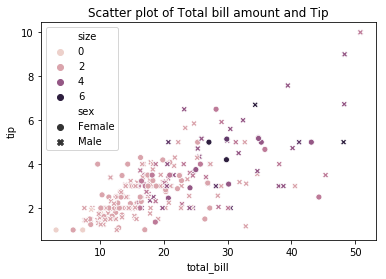

In [74]:
# create the plot
sns.scatterplot(x=df['total_bill'],y=df['tip'], hue=df["size"], style=df["sex"])
# add title
plt.title("Scatter plot of Total bill amount and Tip")
plt.show()

Exploratory data analysis can show whether there is a case for trying a linear regression on the data.
The scatter plot shows that there does appear to be a positive linear relationship of sorts between the two variables total bill and tip amount with the points forming a line across the diagonal from the intersection of the axis up to the top right hand corner. The tip amount does appear to rise with the bill amount as would be expected although there are some observations that this does not seem to hold for. The plot shows a few higher tips for smaller total bills but there are quite a number of observations where the tip seems quite small in comparison to the total bill size. These are the points on the bottom right hand side of the plot under the (imaginary) line and they do not seem to follow the same trend of higher bill amounts leading to corresponding high tip amounts. 

As the correlation coefficients and the scatter plots indicate that there is a linear relationship between total bill and tip amount the next step then is to look at regression.

In addition to scatter plots and joint distribution plots for two variables, seaborn has some regression plots that can be used to visualise relationships and patterns that exist in the data when exploring the data. 
Statistical models are used to estimate a simple relationship between sets of observations which can be quickly and easily visualised and can be more informative than looking at statistics and tables alone.

These regression plots are mainly used to visualise patterns in a dataset during the exploratory data analysis and are not meant to be used for statistical analysis as such. Other python packages such as **statsmodels** are recommended for looking at more quantitative measures concerning the fit of the regression models.

Seaborn has two main functions for visualising linear relationships through regression, `regplot` and `lmplot` which both produce similar output but have slightly different use. `lmplot` has slightly more features while `regplot` is an axes-level function and can draw onto specific axes giving you some control over the the location of the plot).

First a scatterplot of two variables x and y is drawn and then a regression model y ~ x is fitted and plotted over the scatter plot together with a 95% confidence interval for the regression. 

I will use the basic `lmplot` function here to draw a regression model of tip modelled on total_bill amount. The `regplot` function could also be used.
It fits a regression model `tip ~ total_bill` on top of a scatter plot of the two variables. A confidence interval for the regression is drawn using translucent bands around the regression line which estimated using a bootstrap. This feature can be turned off by setting `ci` to None.

If there are outliers in the dataset as there are in the Tips dataset, a robust regression can be fitted which uses a different loss function which downweights relatively large residuals but takes a bit longer to run though.

The regression plot below shows an upward trend in the tip amount as the total bill increases. The confidence interval is wider towards the top of the line. 

Before going any further I will give a little overview of what I have learned about regression and how it can be used on the Tips dataset.

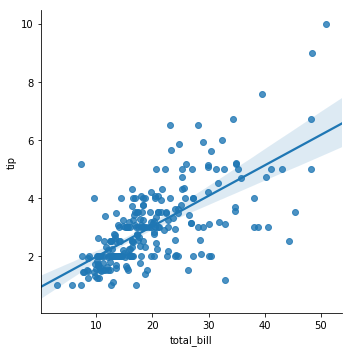

In [79]:
# plotting a regression model of tip ~ total bill on top of a scatter plot.

sns.lmplot(x="total_bill", y="tip", data=df); plt.show()
# 
#sns.lmplot(x="total_bill", y="tip", data=df, robust=True); plt.show()

### Regression.

Regression is the statistical method used to find the equation of the line that best fits the data. It describes the nature of the relationship between variables which can be positive or negative, linear or non-linear.  Regression can be used to to see whether two or more variables are related and if so what is the strength of the relationship. Also what kind of relationship exists and whether predictions can be made from the relationship.
The goal of regression here is to relate two numerical variables in the Tips dataset to each other, specifically the tip amount and the total bill amount. Is the tip amount related to the total bill amount, how and by how much. Can you predict the tip amount if you know the bill amount?

**Simple linear regression** is a common method for looking at relationships between a single explanatory variable and a single quantitative outcome variable. Simple linear regression can therefore be used here to explore a relationship between the total bill amount as the explanatory variable and the tip amount as the outcome variable. (Simple just means that there is only one explanatory variable.) 

In the Tips dataset there are 229 different observed values of the total bill amount but there are many amounts in between these exact bill amounts that could be assumed to also possible values of the explanatory variable. 
There are 123 unique tip amounts because it seems that some rounding up takes place as we saw earlier.

The scatter and regression plots shows that there are many set of observations or points that seem to fall around an imaginary line. Any straight line is characterised by it's slope and intercept and can be expressed as $y = mx +c$  where the slope of the line $m$ shows how much $y$ increases when $x$ is increased by one unit. $c$ is the y-intercept of the line which is the value of $y$ when $x$ is zero. 
Linear regression looks for the equation of the line that the points lie on and finds the best possible values for the slope and intercept.
The best line to fit the data is the one that minimises the cost of the least squares line. This is when the sum of the squared vertical distances from each point to the regression line is at a minimum.

Regression looks at the relationship between the population mean of an outcome variable $Y$ and an explanatory variable $x$. A regression model can be used to find the expected value of the Tip amount as the outcome variable for a given value of the total bill amount as an explanatory variable.   In other words to predict the tip amount expected if we know the total bill amount.

The equation $E(Y|x) = B_0 + B_1x$ linearly relates the tip amount and total bill amount where the expected value of the tip amount (Y) for any particular total bill (x) amount would be equal to the intercept parameter and the slope parameter times the value of the total bill amount as x. Regression finds the estimates of the unknown slope $B_0$ and intercept $B_1$ parameters.
 
In regression there is usually a null and alternative hypothesis. The hypothesis here is whether there is a linear relationship between the total bill and the tip amount. The null hypothesis is usually $H_0: B_1=0$ and the alternative hypothesis is $H_1: B1 \neq 0$. 

If the null hypothesis turns out to be true then the slope parameter is zero and the expected value or population mean of $Y$ will just be equal to the value of the intercept $B_0$. This would mean that the $x$ value (the total bill amount) has no effect on the $y$ value (tip amount) and therefore the tip amount would stay the same for all total bill amounts which is very unlikely. 

The alternate hypothesis is that changes in $x$ are associated with changes in $Y$. That is that changes in the total bill amount are related to changes in the tip amounts.

A regression model would say that for each value of the total bill amount, the population mean of Tip amount over all the observations that have that particular total bill amount can be calculated using the simple linear expression $B_0 + B_1x$. 
The equation $E(Y|x) = B_0 + B_1x$ makes a prediction of the true mean of the Tip amount for any fixed value of the total bill amount.
The exact values of the slope and intercept parameters are not known so estimates of the parameters are made and substituted into this equation. These parameters estimates are called *coefficients*. 

This difference then between what the model says the y values should be (the fitted values $\hat{y}$ ) and what the observed y values actually are squared and summed up. The vertical distances between the actual observed points and the best fit regression line are known as the residuals. The least squares line is the line with the smallest sum of squared residuals. Calculus can be used to find the values of $b_0$ and $b_1$ that give this minimum value and find the best fit line using the following equations:  
  
$$b_1 = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2} \qquad \textrm{and} \qquad b_0 = \bar{y} - b_1 \bar{x} $$

($\hat{B_0}$ and $\hat{B_1}$ are often used instead of $b_0$ and $b_1$ to show these are statistics rather than parameters.)

The regression model assumes linearity within the range of the observed values and there are also assumptions regarding the *errors* where an error in this context is the deviation of the true outcome value from the population mean of the outcome for a given $x$ value. These are known as the residuals.

In his book, Seltman notes that while it is reasonable to interpolate and make predictions for unobserved $x$ values between the observed $x$ values it would be unwise to extrapolate and make predictions outside of the range of $x$ values studied. 

There are only 229 unique total bill amounts in the tips dataset but the linear regression model could be used to make tip predictions for any total bill amounts between the minimum 3.07 and maximum 50.81 dollars but not outside this range. 

#### Finding the regression coefficients:
While seaborn's regression plots can help us spot trends and possible relationships in the data, they do not actually give us the regression coefficients or the [regression equation](https://stackoverflow.com/questions/33490833/display-regression-equation-in-seaborn-regplot) as the creator [Michael Waskom](https://github.com/mwaskom/seaborn/issues/655#issuecomment-125073496) noted, "it is a a library for visualization and not for statistics (statsmodels) or data munging (pandas)".

The lectures on Linear Regression demonstrated how to find the slope and intercept parameters to give the equation of the line that that best describes the data points. First the actual observations are plotted using a scatter plot.
The best line to fit the data is the one that minimises the cost of the least squares line. This is when the sum of the squared vertical distances from each individual data point to the regression line is at a minimum.

The best line is considered the one that minimises the cost $Cost(m,c)$ of the Least Squares Lines $ \sum_i (y_i - mx_i - c)^2 $. 
- Each $y_i$ is the corresponding value of Tip amount to each total bill amount $x_i$ in the dataset. These are actual measured values so $(x_i,y_i)$ is the ith point in the dataset.
- The value $mx_i + c$ is what the model says that $y_i$ should have been. 
- $y_i - mx_i - c$ is the difference between the observed $y_i$ values and the the value the model gives $(mx_i + c)$. - These values are then squared.
- Particular values of $m$ and $c$ will give the lowest values for this cost function which can be plotted on the scatter plot of actual observations. 

The lecture demonstrated how several lines can be drawn as estimates for the model that best fits the data with a given slopes and intercepts. A cost is then calculated for each line and the line with the lowest cost is considered the best fit for the data. A **cost function** is used to determine the best line to fit the data. However the data does not alway fit perfectly and therefore the cost is usually greater than zero. 

If I was to do this for the Tips dataset I would start with a guess of 15% for the slope using the typical tip rate of 15% and 1 as the intercept given the minimum tip in the dataset is 1 dollar.  
Fortunately numpy's `polyfit` function can do this. There are also functions in packages such as `statsmodels` and `scikit-learn`.

#### Using the numpy `polyfit` function

[numpy's polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html?highlight=polyfit#numpy-polyfit) is a function that can fit a polynomial to a set of x and y points. A linear equation is a polynomial of degree 1.
The function returns a vector of coefficients that minimise the squared error - the estimates for the slope and intercept parameters.
It can be used to fit lines in many dimensions and does the calculations involved in minimising the cost function.

In [5]:
# set x and y to be total bill and tip
x, y = df['total_bill'], df['tip']
# use polyfit function on total bill and tip amount. polynomial degree is 1 for a linear equation
np.polyfit(x,y,1)

array([0.105 , 0.9203])

In [6]:
# explanatory variable x is total bill, outcome variable tip is y
x, y = df.total_bill, df.tip
# First calculate the mean total bill amount (mean of x) and the mean tip amount (mean of y)
x_avg, y_avg = np.mean(df.total_bill), np.mean(df.tip)
print("The mean bill amount is $%.3f " %x_avg, "and mean tip amount is $%.3f \n" %y_avg)
#  subtract means from each of the individual total_bill and tip values
x_zero= df['total_bill'] - np.mean(df['total_bill'])
y_zero= df['tip'] - np.mean(df['tip'])

# The best slope m is found by the following calculations:
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# The best slope m from above is used to calculate the best intercept c
c = y_avg - m* x_avg

print("The slope m is calculated above to be %.4f and the intercept c  to be %.4f." %(m,c))

The mean bill amount is $19.786  and mean tip amount is $2.998 

The slope m is calculated above to be 0.1050 and the intercept c  to be 0.9203.


In [7]:
# Calculating the cost for various slope and intercept values

cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])
print("The cost using the above calculated slope  (m = %.3f) and intercept (c = %5.3f): %8.2f" % (m, c, cost(m, c)))
## first for a guess using tip rate of 15% and minimum tip as intercept of 1
print("Cost with m = %.3f and c = %5.3f: %8.2f" % (0.15, 1.1, cost(0.15, 1.1)))
# using the estimates from the polyfit function
print("Cost with m = %.3f and c = %5.3f: %8.2f" % (0.105, 0.9203, cost(0.105, 0.9203)))

The cost using the above calculated slope  (m = 0.105) and intercept (c = 0.920):   252.79
Cost with m = 0.150 and c = 1.100:   570.90
Cost with m = 0.105 and c = 0.920:   252.79


Now we can use the estimate for the slope $m$ and intercept parameter $c$ and put them into the regression equation to find the expected value of the tip amount for any total bill amount (within the range that the slope and intercept were calculated on).
For example $E(Y|x) = B_0 + B_1x$ using the intercept estimate of 0.9203 as $B_0$ and the slope estimate 0.105 for $B_1$ would give the values below. 
We could then check how the model would predict the tip amount for a total_bill amount.

In [34]:
## apply the model to some total_bill amounts to get predictions of tips
B0, B1 =  0.9203, 0.105,
# just selecting a range of total bills between 30 and 40 in steps of 3
for x in range(30,40,3):
    tips_y = B0 + B1*x 
    print(f"For a meal with a total bill of {x:.2f} the expected value of the tip amount is {tips_y:.2f}")
    
#print(f"The tip IQR ranges from {df['tip'].quantile(q=0.25):.2f} to {df['tip'].quantile(q=0.75):.2f} dollars")

For a meal with a total bill of 30.00 the expected value of the tip amount is 4.07
For a meal with a total bill of 33.00 the expected value of the tip amount is 4.39
For a meal with a total bill of 36.00 the expected value of the tip amount is 4.70
For a meal with a total bill of 39.00 the expected value of the tip amount is 5.02


Having made some predictions the next step would be to check how the predictions did on actual observations where we know the total_bill amount and the tip amount.

In [35]:
# selecting some data that fall in the same range predicted for above.
df[(df.loc[:, 'total_bill'] >=30) & (df.loc[:,'total_bill'] <40)].sort_values(by='total_bill')

,total_bill,tip,sex,smoker,day,time,size,Tip%,BillPP,TipPP,total_spent
210,30.06,2.00,Male,Yes,Sat,Dinner,3,6.653360,10.0200,0.666667,32.06
219,30.14,3.09,Female,Yes,Sat,Dinner,4,10.252157,7.5350,0.772500,33.23
44,30.40,5.60,Male,No,Sun,Dinner,4,18.421053,7.6000,1.400000,36.00
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.565988,6.0920,0.400000,32.46
...,...,...,...,...,...,...,...,...,...,...,...
56,38.01,3.00,Male,Yes,Sat,Dinner,4,7.892660,9.5025,0.750000,41.01
112,38.07,4.00,Male,No,Sun,Dinner,3,10.506961,12.6900,1.333333,42.07
207,38.73,3.00,Male,Yes,Sat,Dinner,4,7.745933,9.6825,0.750000,41.73
23,39.42,7.58,Male,No,Sat,Dinner,4,19.228818,9.8550,1.895000,47.00


Of course there are packages with functions that do all this for you such as the scikit learn package but I am not goung to cover that here. 
In this assignment the emphasis is on using the seaborn package so not sure if I should be looking at statsmodel or sci-kit learn or any other packages.
Seaborn does recommend the use of the statsmodels package for any deeper statistical analysis.


#### Calculating R squared - the coefficient of determination.

#### Coefficient of Determination: $R Squared$
The correlation coefficient shows the stength and direction of the relationship between the variables. 

How much of the variance in $y$ that is determined by $x$ can be measured using the Coefficient of Determination also known as R Squared. The $R^2$ value is an estimate of how much the changes in the $y$ values (tip amount) is due to changes in the $x$ values (the total bill amounts) compared to all the other factors that affect the $y$ value. 

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

Sometimes the Pearson correlation coefficient is used instead of the R-squared value. The Pearson coefficient can be squared to get the R-squared value.  Numpy has a function `corrcoef()` that calculates this value.  It returns a matrix of correlation coefficient between each pair of variables which can be squared to get the coefficient of Determination - R squared.

In [98]:
# Calculate the R-squared value for the Tips dataset using numpy corrcoef, 
np.corrcoef(df['total_bill'],df['tip'])
# just get a single value for correlation between total bill and tip from the correlation matrix
print(f" R-squared is:{np.corrcoef(df['total_bill'],df['tip'])[0][1]**2:.4f} ")

 R-squared is:0.4566 


There are clearly other factors that affect the tip amount other than the size of the total bill. According to the R-squared statistic only 46% of the variation in the tip amount is related to the total bill amount. 


#### statmodels


In [10]:
# import ols for ordinary least squares regression
from statsmodels.formula.api import ols
# fit the model
model = ols('tip ~ total_bill', data=df).fit()
# inspect the statistics derived from the fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           6.69e-34
Time:                        13:34:10   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

### Summary of regression of total bill and tip amount so far.

In [116]:
# correlation of total bill and tip amounts.
print("The correlation coefficient between total bill and tip amount is %.3f" %df['total_bill'].corr(df['tip']))
print(f"The coefficient of determination R squared is {np.corrcoef(df['total_bill'],df['tip'])[0][1]**2:.4f}")
print(f"The estimates for the slope and intercept parameters are {np.polyfit(df['total_bill'],df['tip'],1)[1]:.4f} and {np.polyfit(df['total_bill'],df['tip'],1)[0]:.4f} ")

The correlation coefficient between total bill and tip amount is 0.676
The coefficient of determination R squared is 0.4566
The estimates for the slope and intercept parameters are 0.9203 and 0.1050 


- A scatterplot is used to show the shape of the relationship between the variables.
- There is quite a strong positive relationship between total bill and tip amount but it is not perfectly linear.
- There can be two or more independent variable and one independent variable. While there is a relationship between the total bill amount and the tip amount, we could also see that there is a positive relationship between the size of party and the tip amount. 
- The coefficient of determination (also known as R squared) is a better indicator of the strength of a linear relationship between total bill and tip amoount than the correlation coefficient because it shows the percentage of the variation of the dependent variable (tip) that is directly attributed to the independent variables (total bill). The $R^2$ value is an estimate of how much the changes in the $y$ values (tip amount) is due to changes in the $x$ values (the total bill amoounts) compared to all the other factors that affect the $y$ value. 

- Numpy `corrcoef()` function calculates the  Pearson correlation coefficient  which can be squared to get the R-squared value.  
- While the correlation coefficient is 0.676, the $R^2$ values is lower at 0.456.
- The coefficient of determination is got by squaring the correlation coefficient then converting the result to a percentage.
- The standard error of the estimate is an estimate of the standard deviation of the y values about the predicted $\hat{y_i}$ values
- The standard error of estimates can be used to construct a prediction interval 


Next I will look more at the regression plots in the seaborn package. The `lmplot` was used to look at the relationship between the total bill and tip amount.

#### Fitting a linear regression where one of the variables is a discrete variable.
You can also fit a linear regression when one of the variables takes discrete values for example if using the `size` variable which only takes 6 possible values in the Tips dataset.  In this case you can  add some random noise known as jitter to the discrete values to make the distribution of those values more clear although this jitter does not influence the regression line fit itself. 
`sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)`.
Alternatively you can collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval.
`sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)`.
The regression plot of tip against size shows that the tip amount increases by the size of the party up to a party size of 4 then the tip amount seems to fall a bit in relation to the size for parties of 5 and 6 people.


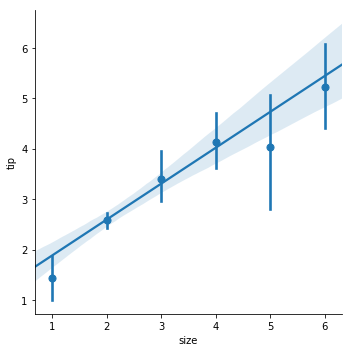

In [21]:
sns.lmplot(x="size", y="tip", data=df, x_estimator=np.mean); plt.show()

### Fitting different regression models

The seaborn tutorial shows ways of fitting different regression models to a dataset where simple linear regression might not be the most suitable. 
Both `lmplot` and `regplot` can be used to fit a polynomial regression model for higher order polynomials. To do so you use the `order` argument to the regression plot.
A robust regression can be fitted using a different loss function to deal with outliers where it downweights relatively large residuals.
If the y variable is binary then there is a logistic regression model. This shows the estimated probability of y being 1 for a given value of x or y being 0. 
The tutorial shows a logistic regression fitted to the Tips data where a binary variable is created called 'big_tip' for tips that are greater than 15% of the total bill amount. This plot shows that the number of "big_tips" actually falls as the size of the total bill gets biggers. 

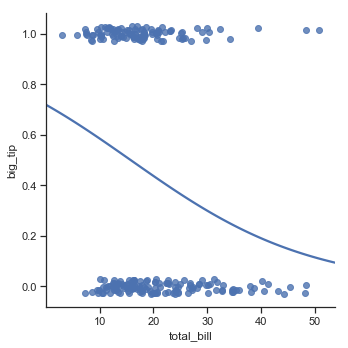

In [48]:
# big tip variable for tips greater than 16%

df["big_tip"] = (df.tip / df.total_bill) >.16
sns.lmplot(x="total_bill", y="big_tip",data=df,logistic=True,ci=None, y_jitter=.03)
axes[0].set_title("Logistic regression of Tip ~ Total Bill ")
plt.show()

In [50]:
# Drop this variable again from df
df=df.drop("big_tip", axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Here I am trying out different order polynomial regression functions on the tips ~ total bill.

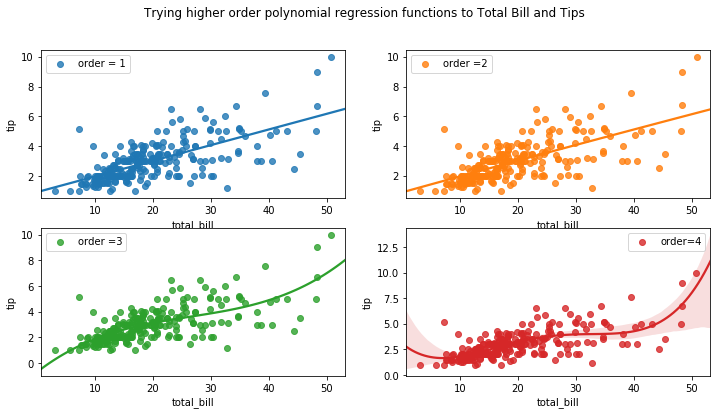

In [43]:
f, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.regplot(x="total_bill", y="tip", data=df, ax=axes[0,0], label="order = 1", ci=False); axes[0,0].legend()
sns.regplot(x="total_bill", y="tip", data=df, order=2, ax=axes[0,1], label="order =2", ci=False); axes[0,1].legend()
sns.regplot(x="total_bill", y="tip", data=df, order=3, ax=axes[1,0], label="order =3", ci=False); axes[1,0].legend()
sns.regplot(x="total_bill", y="tip", data=df, order=4, ax=axes[1,1], label = "order=4"); axes[1,1].legend()
plt.legend()
plt.suptitle("Trying higher order polynomial regression functions to Total Bill and Tips")
plt.show()

In my opinion the polynomial with order 3 looks like a better fit to the line than the first order linear regression line.

#### lowess smoother
The seaborn tutorial shows another way of fitting a nonparametric regression using a lowess smooth.
[lowess smoothing](https://www.statisticshowto.datasciencecentral.com/lowess-smoothing/) is used to fit a line to a scatter plot where 
noisy data values, sparse data points or weak interrelationships interfere with your ability to see a line of best fit. It also used for linear regression where least squares fitting doesn’t create a line of good fit or is too labor-intensive to use.
Lowess are non-parametric strategies for fitting a smooth curve to data points. A parametric fitting assumes the data fits some distribution which can misrepresent the data whereas non-parametric smoothers try to fund a curve of best fit without assuming the data must fit some distribution shape.

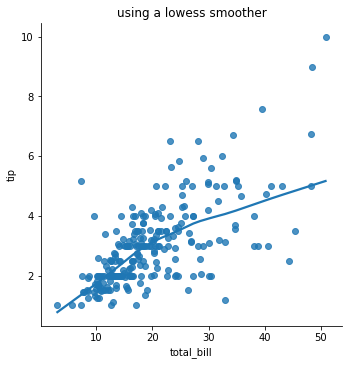

In [44]:
sns.lmplot(x="total_bill", y="tip", data=df, lowess=True)
plt.title("using a lowess smoother")
plt.show()

#### Residual plots
Seaborns `residplot()` function is used for checking whether the simple regression model is appropriate for a dataset. 
A [residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html#seaborn-residplot) fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0.
If there is structure in the residuals, it suggests that simple linear regression is not appropriate.

If the residual plot does have  shape this suggest non-linearity in the data set. A funnel shape pattern suggests that the data is suffering from heteroskedasticity, i.e. the error terms have non-constant variance.
<https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/>

Applying the `residplot` to the data does seem to show this funnel shape suggesting that the tips dataset does suffer from heteroskedasticity.

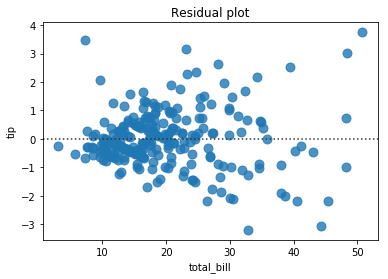

In [45]:
sns.residplot(x="total_bill", y="tip", data=df, scatter_kws={"s": 80})
plt.title("Residual plot"); plt.show()

### Effect of another variable on the relationship between total bill and tip amount.
So far I have only looked at regression plots showing the relationship between two variables tip and total bill alone. It is clear from the earlier analysis that while the total bill amount definitely influences the amount of tip, there are other factors that come into play. This is what I look at next - how the relationship between these two variables changes as a function of a third variable

#### Conditioning on other variables.

How does the relationship between tip and total_bill amount change as a function of a third variable?

The `regplot` function is best when you want to control the location of the plots as you can specify which axes to use.

`lmplot` is the seaborn function to use here as it actually combines the `regplot` function with a `FacetGrid` and can be used to see if there are any interactions with up to three additional variables. The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them which I will do here. 

I am going to use the `lmplot` function to see if there are any interactions on the relationship between total bill and tip amount by using colour through the hue semantic. Additional variables can be added by drawing multiple "facets" for each level of the variable to appear in a different `row` or `col` on a grid. However I do think that this can get very complicated to read although it would save space.


#### Effect of party size on the relationship between total bill and tip amount
Here I use the `lmplot` to look at the relationshiop between total bill and tip amount taking into account other variables. Firstly conditioning on just party size shows that steeper lines for parties of 1 then 4, 3 and 2. For the larger parties the regression line is almost flat. However parties of 5 and 6 are not very common in the dataset as can be seen by the sparsity of points.

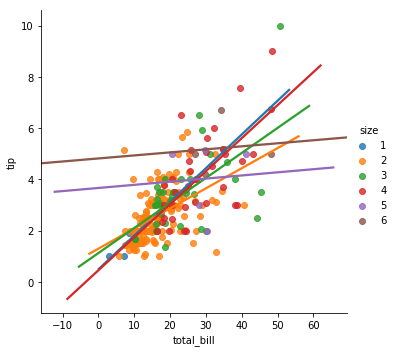

In [85]:
sns.lmplot(x="total_bill", y="tip", hue="size",ci=False,data=df)

#### Effect of Sex of bill payer on the relationship between total bill and tip amount.
Here I have conditioned on sex of the bill payer using the hue semantic and on the smoker status using columns.
There are more male bill payers in the dataset than female bill payers, however the difference on the regression line is very small with male bill payers paying slightly less tips on average for smaller bills than females but at the other end males are paying slightly higher tips than females for higher bills. There are fewer females paying higher bill amounts.

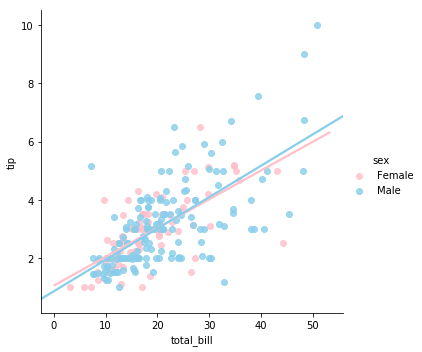

In [91]:
sns.lmplot(x="total_bill", y="tip", hue="sex",data=df, palette=["pink","skyblue"], ci=False)
plt.title("Effect of sex of bill payer on the relationship between total bill and tip amount"); plt.show()

#### Effect of Smoker on the relationship between total bill and tip amount.
Here I have conditioned on a smoker in the party using the hue semantic and on the smoker status using columns.
It seems than non-smokers tend to be less generous for smaller bills but more generous at the higher end while non-smokers pay higher tips on lower bills but seem to get less generous relative to the bill as the bill increases.


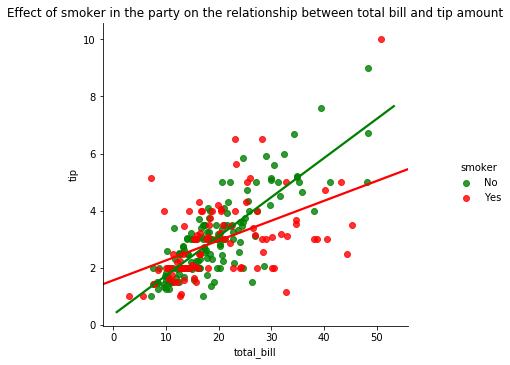

In [93]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",data=df, palette=["g","r"], ci=False)
plt.title("Effect of smoker in the party on the relationship between total bill and tip amount"); plt.show()

#### Effect of Smoker and sex on the relationship between total bill and tip amount.

It seems to me that smoker status does have some influence on the relationship between the total bill and the tip amount, more so than the sex of the bill payer. The regression plots below show that higher bills tend to lead to higher tips by parties with non-smokers than with smokers. 
In part 3 I will look more closely at the difference between male and female smokers.

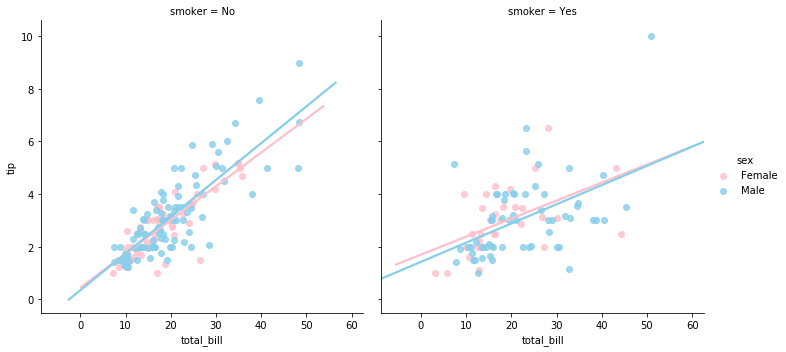

In [95]:
sns.lmplot(x="total_bill", y="tip", hue="sex",col="smoker",ci=False,data=df, palette=["pink","skyblue"])

#### Effect of Day of week and time on the relationship between total bill and tip amount.

The regression plots below show how the relationship between total bill and tip amount varies by day of the week and whether it is lunch or dinner time. There are very few lunches in the dataset on days other than Thursdays - in fact only 7 on Fridays and none at all on Saturdays on Sundays. 
Looking at dinners by day, the steepest lines is for dinner on a Thursday but this was a single observation so we can't infer much from this. Saturdays shows the steepest slope so tips become more generous relative to the bill as the bill amount grows. On the other hand people are more generous with tips for smaller bills.

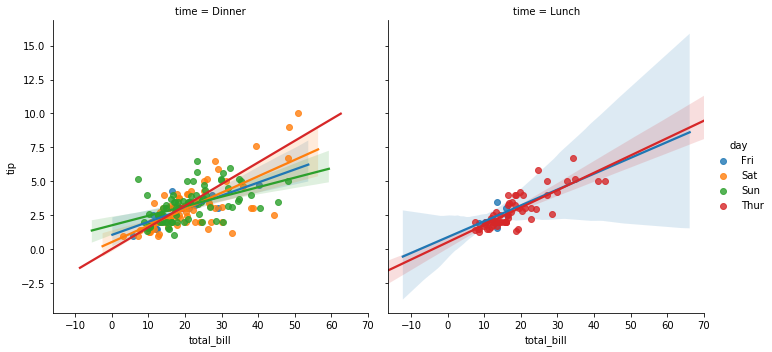

In [42]:
#  
# faceting by time and also by day of week
sns.lmplot(x="total_bill", y="tip", hue="day", col="time",data=df); plt.show()

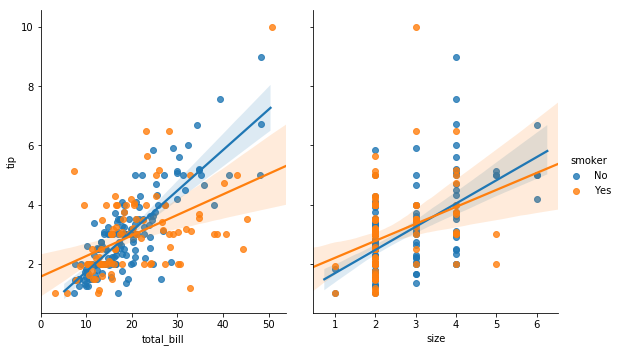

In [59]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"], hue="smoker", height=5, aspect=.8, kind="reg");

***
#### Regression using the percentage tip rate as the outcome variable

Here I am just going to use the percentage tip instead of the actual tip amount as the outcome variable.
I don't think this would actually make sense as people tend to tip using customary 15% as a guideline. Maybe then logistic regression should be used and a binary outcome that is greater than 15% or less tha 15%

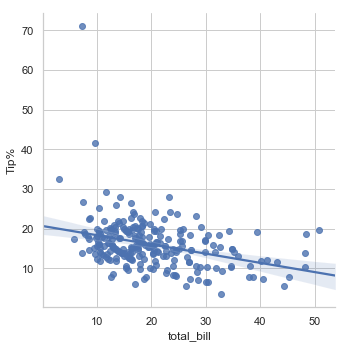

In [51]:
# plotting a regression model of Tip% ~ total bill on top of a scatter plot.

sns.lmplot(x="total_bill", y="Tip%", data=df); plt.show()

In [52]:
# set x and y to be total bill and Tip%
x, y = df['total_bill'], df['Tip%']
# use polyfit function on total bill and tip amount. polynomial degree is 1 for a linear equation
np.polyfit(x,y,1)

array([-0.2323, 20.6766])

In [53]:
# Calculate the R-squared value for the Tips dataset using numpy corrcoef, 
np.corrcoef(df['total_bill'],df['Tip%'])
# just get a single value for correlation between total bill and tip from the correlation matrix
print(f" R-squared is:{np.corrcoef(df['total_bill'],df['Tip%'])[0][1]**2:.4f} ")

 R-squared is:0.1147 


In [54]:
# correlation of total bill and percentage tip.
print("The correlation coefficient between total bill and Tip percentage is %.3f" %df['total_bill'].corr(df['Tip%']))
print(f"The coefficient of determination R squared is {np.corrcoef(df['total_bill'],df['Tip%'])[0][1]**2:.4f}")
print(f"The estimates for the slope and intercept parameters are {np.polyfit(df['total_bill'],df['Tip%'],1)[1]:.4f} and {np.polyfit(df['total_bill'],df['tip'],1)[0]:.4f} ")

The correlation coefficient between total bill and Tip percentage is -0.339
The coefficient of determination R squared is 0.1147
The estimates for the slope and intercept parameters are 20.6766 and 0.1050 


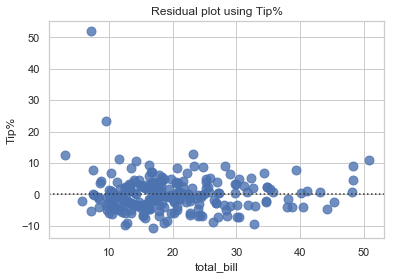

In [55]:
sns.residplot(x="total_bill", y="Tip%", data=df, scatter_kws={"s": 80})
plt.title("Residual plot using Tip%"); plt.show()

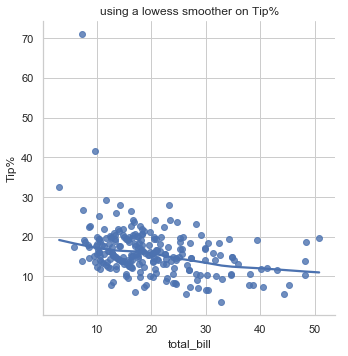

In [56]:
sns.lmplot(x="total_bill", y="Tip%", data=df, lowess=True)
plt.title("using a lowess smoother on Tip%")
plt.show()

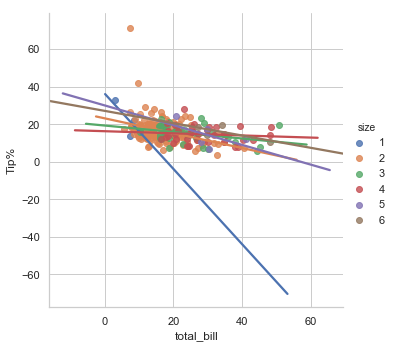

In [63]:
sns.lmplot(x="total_bill", y="Tip%", hue="size",ci=False,data=df)

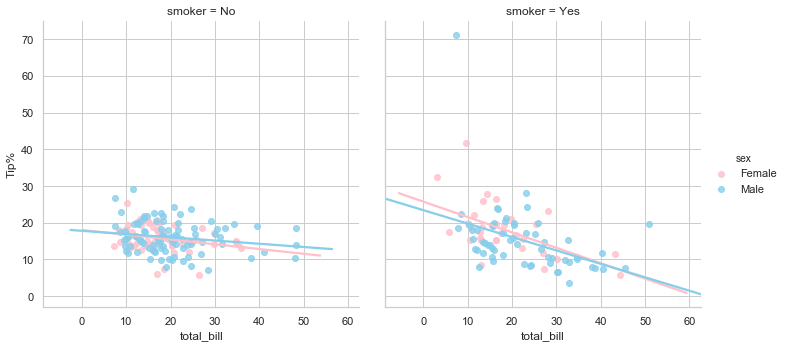

In [58]:
sns.lmplot(x="total_bill", y="Tip%", hue="sex",col="smoker",ci=False,data=df, palette=["pink","skyblue"])

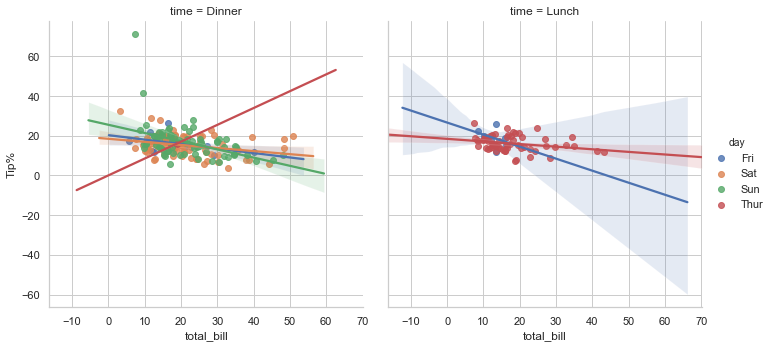

In [61]:
sns.lmplot(x="total_bill", y="Tip%", hue="day", col="time",data=df); plt.show()

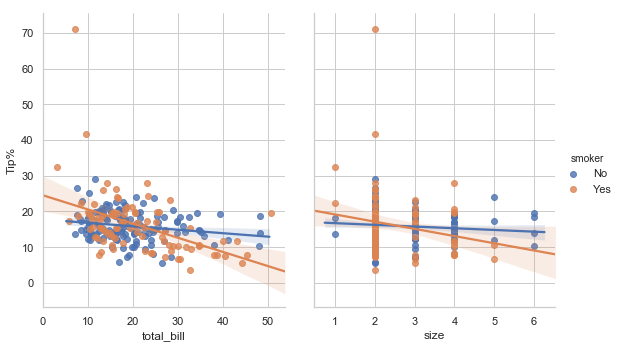

In [69]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["Tip%"],hue="smoker", height=5, aspect=0.8,kind="reg");

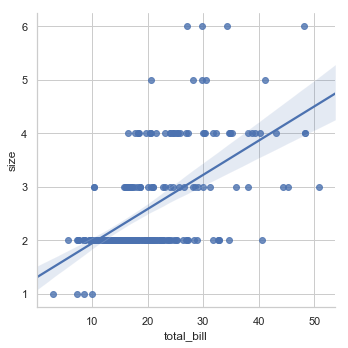

In [70]:
sns.lmplot(x="total_bill", y="size",data=df)

### Review of Part 2 on Regression: Is there a relationship between total bill and tip amount.

In this section I looked at the covariance and correlation measures to see if there was a linear relationship between the total bill and tip amount. These statistics indicated that there was a positive and fairly strong linear (0.68) relationship between the total bill amount and the tip given.
Scatter plots are graphical ways of depicting the relationship between one variable and another and a relationship between total bill and tip was visible. 
I looked at what exactly linear regression in and how it is used to find the equation of the line that best fits the data. I outlined some of the steps involved and how the method could be applied to the total bill and tip variables in the Tips dataset to find a relationship and also to be able to predict an expected tip amount given a total bill amount.
Seaborn does not actually give you any statistical values such as the regression coefficients or the regression equation. There ar many other packages to do this. I used the numpy polyfit function to fit a linear eqaution to the data that minimises the cost function. 
The coefficient of determination, also known as R-squared was also calculated using numpy. While the correlation coefficients provide a measure  of the strength and direction of the relationship between variables, the coefficient of determination is an estimate of how much of the changes in one variable such as tip are due to changes in the total bill amount. The r-squared value of 0.4566 indicate that only 46% of the variation in the tip amount is due to the variation in the total bill amount.
Using seaborn plots I then looked at the various other regression models such as logistic regression which could be applied to the dataset if the tip variable was converted to a binary variable with 0 representing values under a particular percentage tip and 1 representing values over.
I also visualised higher order polynomial regression functions applied to the data to compare with the linear regression model. 
Regression using a lowess smoother was also shown. This could be suitable for the tips dataset as the least squares line doesn't create a line of good fit for the higher total bill amounts.  
Seaborn also has some residual plots which did indicate that the data may be suffering from heteroskedascity and therefore linear regression may not be appropriate.
I then looked at the effect of the other variables in the dataset on the relationship between the total bill and tip amount. Seaborn `lmplots` were used here with hue semantics and facets to show the effects of other variables. 

I then looked at using the tip as a percentage of total bill as the outcome variable with the total bill amount as the explanatory variable. 

The plots showed that tip amount is certainly related to the total bill amount but as the total bill creeps up the tip rate seems to fall. Total bill size is related to size of the party. Tip rate starts to fall off as the size of the party increases but more so for smokers than non-smokers.
I will be looking further at relationships between the variable in part 3.
### May come back to this!

***
# Part 3 Analysis: Analyse the relationship between the variables within the dataset.

Analyse: analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those. 

Part 1 above described the variables in the Tips dataset using statistics and some plots to visualise the distribution of the data in the Tips dataset. It used both non-graphical and graphical univariate exploratory data analysis. 
Part 2 looked at the relationship between the total bill amount and the tip using regression. Although this did touch on looking at how other variables interacted with the total bill in determining bill amount, I will look at this more closely here.
Part 3 now looks at the relationship between the variables in the dataset not limited to just the total bill and tip amount variables. Therefore in this section I look at multivariate analysis of the dataset using both non-graphical and graphical means. There is some overlap with part 1 and part 2 as I thought I should look at the relationships between the variables before looking at regression in any detail which is shown in the pairplots at the end of part 1. I will try not to duplicate here. 

The univariate statistics and plots in part 1 were informative about the dataset as a while, providing the distribution of each of the variables. This section looks in more detail at the various variables and their relationship with other variables. I will focus more on using plots to visualise the data here rather than producing too many tables of data.

Cross tabulation is the basic non-graphical EDA technique where two way tables are constructed using the levels of one variable against the levels of another variable. It can also be used for more than two variables by cross tabulating two or more variables against each level of a third variable.

There are several way ways of accessing subsets of the dataframe such as filtering for a specific condition, using  boolean masks etc. Statistics such as those used in part 1 and part 2 can then be calculated on such subsets.

For example `df[df.loc[:, 'sex'] == 'Male'].describe()` will select all observations in the dataframe for males and then calculate the summary statistics on this or `df[df.loc[:, 'smoker'] == 'Yes'].describe()` calculates the summary statistics on smokers only.

Pandas `groupby` function can be used to seperate the dataset into groups based on criteria such as by `sex`, `smoker` etc before applying a function to each group independently and then combining the results back into a data structure.
For example `df.groupby(["sex","smoker"]).count()` groups the dataframe by sex and by smoker, then calculates the count on each sub-group. This allows you compare the statistics for one subgroup to another such as a smoking female versus a non-smoking female or a smoking male.

Another option is to use [pivot tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivot-tables).

I will use the `groupby` method first. Using `groupby` function it is important the order the variables are supplied to the function. The dataset will be first split by the first variable, then the next variables in order. While it is possible to show the groupings by more than 2 variables this makes the tables harder to read so I will leave this for the plots to show.  

The seaborn tutorial section [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html#visualizing-statistical-relationships) mentions how *Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.*

There are many ways of showing relationships between variables using the seaborn package using either figure-level functions or axes level functions. *“figure-level” functions are optimized for exploratory analysis because they set up the matplotlib figure containing the plot(s) and make it easy to spread out the visualization across multiple axes using seaborn `FacetGrid` to place the legend outside the axes.*

`relplot()` is a (figure-level) function for visualizing statistical relationships using scatter plots or line plots. These are fairly simple 2 dimensional plots of the data but further dimensions can be added where the hue(colour), size, and style semantics of the points can take on meaning representing further variables in the same plot.

Showing several semantic variables at the same time on a single plot may not always be suitable, instead multiple plots may be more appropriate for showing the relationship between multiple variables. Instead of using additional variables as semantics they could be used to facet the plots. This is where you make multiple axes and plot subsets of the data on each one. (`FacetGrid`).

Seaborn's [facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn-facetgrid) is a class for mapping a dataset onto multiple axes in a grid of rows and columns corresponding to levels of variables in the dataset and it can represent levels of a third variable using hue. You first initialise the FacetGrid object with the dataset and variables to be used on the grid. Plotting functions can be applied to each subset by calling `FacetGrid.map()`.

The `pairplot` function shows scatter plots of the variables against each other with a kernel density function or histogram is displayed down the diagonal. The scatter plot shows the joint distribution of two numerical variables where each point represents an observation in the dataset and can be used to spot relationships. 

The `catplot()` can show different representations of the relationship between one numeric variable and one (or more) categorical variables by specifying the `kind` of plot to use: 
- `kind="swarm"` creates a scatter plot where the positions of the points along the categorical axis are adjusted to avoid overlapping points: `sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=tips)`

- `kind = "violin"` creates a kernel density estimation to represent the underlying distribution that the points are sampled from.: `sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips)`

- `kind ="bar"` to show only the mean value and its confidence interval within each nested category: `sns.catplot(x="day", y="total_bill", hue="smoker",kind="bar", data=tips)`

In [13]:
# reading in the csv again to start without the extra variables created earlier.

df =  pd.read_csv(csv_url)  ## create a DataFrame named df from reading in the csv file from a URL

### Gender and Smoker: How does the characteristics of the customers matter in this dataset?

In this section I will focus on the two binary categorical variables *sex* and *smoker* where the sex variable refers to the gender of the bill payer which has two levels *Male* and *Female*. `smoker` is a binary variable that has two levels *Yes* and *No*.
These variables represent characteristics of the customers unlike the other two variables *time* and *day* which refer to when the dining takes place.
I would not have thought that smoker status would have an effect on the tip given in relation to the total bill amount but in part 2 when I looked at the relationship between total bill and tip amount, it did seem to have some effect. Sex of the bill payer on the other hand did not seem to matter much.
Time represents whether the meal was at lunch or dinner time but there are few if any lunches in the dataset outside of Thursdays with a small number on Fridays. All meals in the dataset for the weekend represent dinners only. Therefore I don't think there is much value in looking at the time variable in too much detail for this particular dataset.

I will first look at the gender variable and see how it relates to the other variables in this particular dataset. In part 1 we saw how there were almost equal numbers of male and female bill payers on weekdays but far more male bill payers than females on the weekends.
The boxplots of total bill by day showed that the amounts spent by males were more variable and the median bill was generally higher for male bill payers except on Saturdays when the medians of male and bill payers were similar.
Note that there is no information about the makeup of the party other than the sex of the bill payer. Similarly we only know that there was smokers present in the party but not how many and whether the bill payer was a smoker or non smoker.
From part 2 we can see that the size of the party does seem to be a factor in determining the tip amount. I don't think relating size through sex or smoker status would make sense though as there is no information at all regarding the sex or smoker status of individual party members. We only know that there was zero smoking customers in the no-smoker class but not how many non-smokers in a party with smokers.

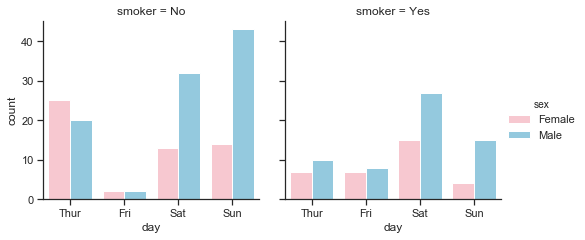

In [123]:
sns.catplot(x="day", kind="count", data=df, hue="sex", col="smoker", palette=gender_pal, height=3.5, aspect =1, order=day_order)
plt.show()

This plot above shows the count of customers across male and female bill payers. It also shows the number of parties which had a smoker present. The main observation from this plot is that Saturdays were the busiest days for smokers here. The weekends were busiest overall. There are more male than female bill payers overall, more female non-smokers on Thursdays than male non-smokers.The proportion of smokers on Fridays was highest but the overall number of tables served on Fridays was quite small.

The next plot below shows the a swarm plot which is a form of a categorical scatter plot where the points don't overlap. There is a lot of information on this plot. 

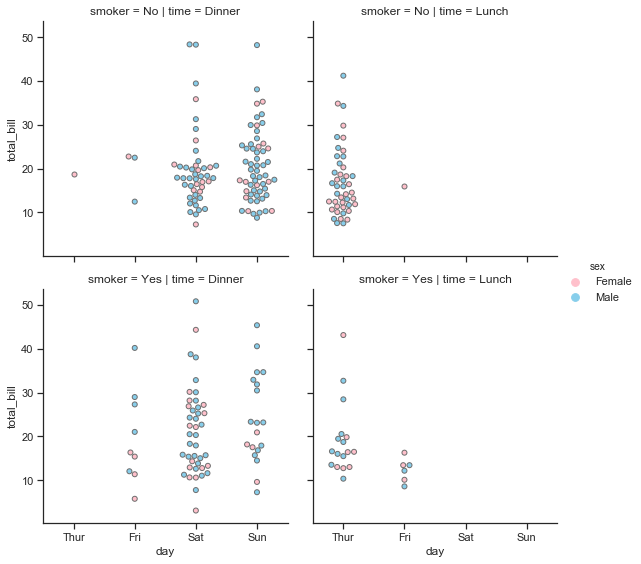

In [121]:
sns.set(style="ticks")
g= sns.catplot(x="day", y="total_bill", hue="sex",row="smoker", col="time", data=df, palette=gender_pal, height=4, 
               aspect =1, kind="swarm", linewidth=1, order=day_order)



The total_bill amount is shown on the vertical axis. The days are shown on the horizontal axis ordered by day as used earlier.

We can see that there was only 1 dinner on a Thursday paid for by a female with no smokers in the party. The remaining meals were lunches, mostly with non-smokers only and there seems to have been just slightly more female bill payers than male. 
One of the most obvious things from these plots above is that Friday is a very quiet day for non-smokers.
There was very few customers overall on Friday; most meals served were dinners, there were more smoking than non-smoking parties and an almost even split between male and female bill payers.
Saturday then was busier than the weekdays but only dinners were served. There was quite a few more male bill payers than female bill payers and there was nearly the same number of parties with smokers present as non-smokers.
Sundays was again very busy but will less smokers present, the bills were still mostly settled by males.
This plot also shows how the total bill amounts were distributed. The lowest 2 bills were paid for by females with smokers in the party. The largest bill was paid for by male with smoker present. There were a few large bills on weekends paid for by males across both smoking levels. The size of the party is not shown here.


Where there are male bill payers with smokers in the party, the total bill size is more variable whereas male non-smokers total bills are clustered in the low-mid price bill range. There are no high total bills for female non-smokers.

A [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn-barplot) is used to show point estimates and confidence intervals as rectangular bars. Here I use it to show the mean value of the tip amount broken down by male and female bill payers.The vertical lines on top are the confidence intervals showing the uncertainty around the mean.
The difference in the average tip paid by male and females was more pronounced on Thursdays and Saturdays with the mean
tip paid by male bill being higher than that of females on Thursdays and Saturdays but slightly lower on Fridays and Sundays. There was more variability in the tip by males on Fridays than females.
There is a bigger difference in the mean tip between male and female non-smokers than between smokers of both sexes. The highest average tips were paid by male non-smokers.



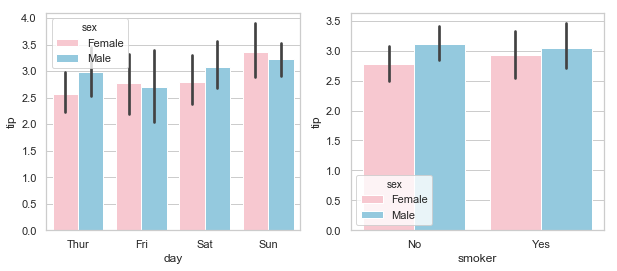

In [126]:
# a barplot showing the count of total_bill 
sns.set(style="whitegrid")
# set up number of subplots and figure size
f, axes = plt.subplots(1, 2, figsize=(10, 4)) 
order=["Thur", "Fri", "Sat","Sun"] # the order to be shown on the plot

# plot mean tip by day by sex 
sns.barplot(x ="day", y="tip", hue="sex", palette=gender_pal,data =df, order=day_order, ax=axes[0]) #

# plot mean tip by smoker by sex
sns.barplot(x ="smoker", y="tip", hue="sex", palette=gender_pal,data =df, ax=axes[1]) # More
plt.show() # hide the matplotlib axes text

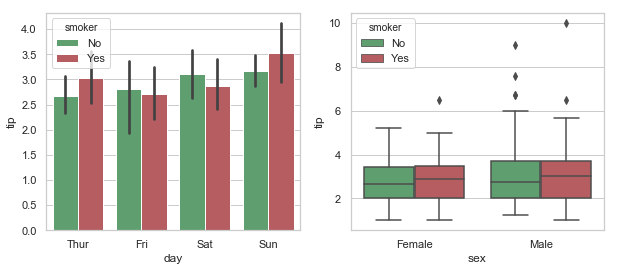

In [93]:
# set up number of subplots and figure size
f, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
# plot number of tips (or total_bill) by smoker using length as the estimator instead of mean
sns.barplot(x ="day", y="tip", hue="smoker", palette=["g","r"],data =df, order=order, ax=axes[0]) # More 

sns.boxplot(x="sex",y="tip" ,hue="smoker",data=df.drop(172), palette=["g","r"], ax=axes[1]) 
# bill amount by dining time, grouped by sex



When looking at the mean tip paid by smoker versus non-smoker, smokers paid on average a higher tip on Thursdays and Sundays. Non-smokers on Fridays were the most variable. Sunday smokers paid the highest average tip. 



1. There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend. This could be for any number of reasons, dates, boys nights out, couples!
2. There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded for Fridays than any other days, these customers are mostly smokers. (perhaps after work?!).
3. There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.

This dataset contains only the tables served by one waiter who may just work less hours on a Friday. There is no data at all for Monday, Tuesday or Wednesday.


Next looking at the boxplots shows that there is more variability in the total bill amounts by males. The median bill amount is generally lower for female bill payers except on Saturdays when it is just slightly more than that on male bill payers.
Females tend to be less variable than males but there is no substantial difference between the total bills paid by females smokers and non-smokers. There are some smaller bills by female smokers and a few outliers but not such a difference as can be seen between the male smokers and non-smokers. Male smokers have a wider distribution of total bills and is skewed towards higher bills. 

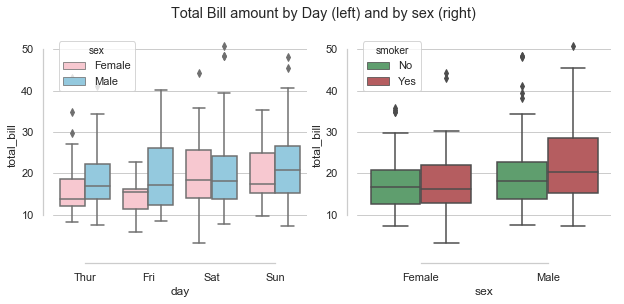

In [28]:
sns.set(style="whitegrid")

# set up number of subplots and figure size
f, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

# bill amount by day, grouped by sex
sns.boxplot(x="day",y="total_bill" ,hue="sex",data=df, palette=gender_pal, order=day_order, ax=axes[0]) # controlling the day or
# bill amount by sex, grouped by smoking status
sns.boxplot(x="sex",y="total_bill" ,hue="smoker",data=df, palette=smoker_pal, ax=axes[1]) 
# bill amount by dining time, grouped by sex

sns.despine(offset=10, trim=True) # remove the spines
plt.suptitle("Total Bill amount by Day (left) and by sex (right)")
plt.show() # get rid of text above plots

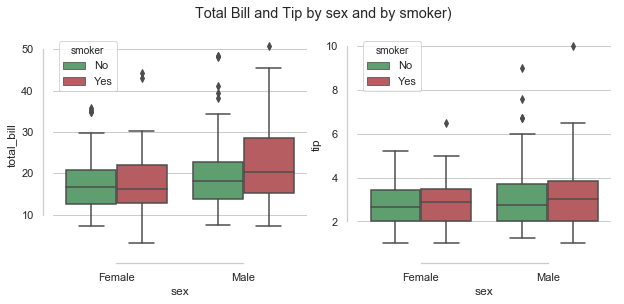

In [27]:
sns.set(style="whitegrid")

# set up number of subplots and figure size
f, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

# bill amount by sex, grouped by smoking status
sns.boxplot(x="sex",y="total_bill" ,hue="smoker",data=df, palette=smoker_pal, ax=axes[0]) 
# bill amount by dining time, grouped by sex
sns.boxplot(x="sex",y="tip" ,hue="smoker",data=df, palette=smoker_pal, ax=axes[1]) 
# bill amount by dining time, grouped by sex

sns.despine(offset=10, trim=True) # remove the spines
plt.suptitle("Total Bill and Tip by sex and by smoker)")
plt.show() # get rid of text above plots

The boxplots above show that while male smokers tend more towards higher bills than male non-smokers or females (smokers and non-smokers), the median tip amount does not seem to rise by the same level.

Next I look again at a scatter plot of total bill and tip amount with the a regression line plotted. The effect of a smoker being present does seem to impact the slope of the regression line with a steeper line for non smokers. The plot also shows that the sex of the bill payer does not have much influence on the tip amount. There seems to be a stronger linear relationship between total bill and tip for non-smokers.

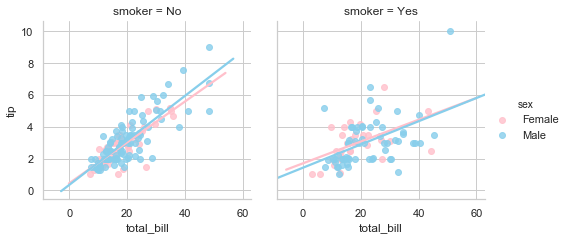

In [29]:
sns.lmplot(x="total_bill", y="tip", hue="sex",col="smoker",ci=False,data=df, palette=gender_pal, height=3.5, aspect =1); plt.show()

More male than female bill-payers overall. Where there are male bill payers with smokers in the party, the total bill size is more variable whereas male non-smokers total bills are clustered in the low-mid price bill range. There are no high total bills for female non-smokers.

#### Now some statistics by gender and smoker


First I will look at the difference in total bill and tip amounts when the sex of the bill payer is taken into account.
As the output from the `describe` function can get quite large when using cross-tabulation so I will limit the output of the percentiles to just the median value. The percentiles can be seen on the plots.

Pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#group-by-split-apply-combine) function allows you to aggregate by more than one statistic so in this way I can specify the actual statistics I want to see.
I will also look at using pivot tables here and then do some seaborn plots.

In [60]:
grouped=df.groupby(['sex'])
grouped.agg([np.mean, np.std]).round(2)

total_bill         tip        size      
             mean   std  mean   std  mean   std
sex                                            
Female      18.06  8.01  2.83  1.16  2.46  0.94
Male        20.74  9.25  3.09  1.49  2.63  0.96

In [55]:
df.groupby(['smoker']).agg([np.mean, np.std]).round(2)

total_bill         tip        size      
             mean   std  mean   std  mean   std
smoker                                         
No          19.19  8.26  2.99  1.38  2.67  1.02
Yes         20.76  9.83  3.01  1.40  2.41  0.81

In [62]:
df.groupby(["sex","smoker"]).agg([np.mean, np.std]).round(2)

total_bill         tip        size      
                    mean   std  mean   std  mean   std
sex    smoker                                         
Female No          18.11  7.29  2.77  1.13  2.59  1.07
       Yes         17.98  9.19  2.93  1.22  2.24  0.61
Male   No          19.79  8.73  3.11  1.49  2.71  0.99
       Yes         22.28  9.91  3.05  1.50  2.50  0.89

In [63]:
df.pivot_table(values='tip', index=['sex','smoker'], columns=['size'], aggfunc=np.mean)

size               1         2         3         4     5     6
sex    smoker                                                 
Female No      1.415  2.370606  2.918889  4.014286  5.14  4.60
       Yes     1.000  2.736800  3.846000  4.045000   NaN   NaN
Male   No        NaN  2.557544  3.148824  4.262632  5.00  5.85
       Yes     1.920  2.692927  4.272857  3.981111  2.50   NaN

#### Does the sex of the bill payer influnce the tip amount? 
The number of male bill payers is almost twice the number of female bill payers. 
The statistics show that the average bill amount when paid for by a female is lower at 18 dollars compared to 21 dollars when paid for by a male. The average tip amount is the same so this would imply that female bill payers pay a higher tip rate. (I will look at tip rates below).
The median bill amount is 2 dollars lower than the mean for females but 3 dollars lower than the mean for males.

When females are paying the bills there is less variability in both the bill amount and the tip amount with smaller ranges of values and smaller standard deviations.

The largest bill and tip was paid for by a male  and the smallest bill size was paid for by a female. 

It is important to remember here that while we know the sex of the bill payer we do not know the sex of the individuals in any party.

(Using the new percentage `tip_rate` variable shows that on average that female bill payers give slightly higher tip as a percentage of the total bill amount. - I have not yet added this back in)

#### Does having a smoker in the party influnce the tip amount? 
When there is a smoker in the party, the mean bill amount is higher by 2 dollars but the mean tip remains the same at 3 dollars. The total bill amounts are more variable with the standard deviation higher by 2 and the range of values being wider. 
It is important to note that we only know whether there is a smoker in the party or not. There is no more information in the dataset regarding how many of the party are actually smokers or whether the bill payer was a smoker or not so of all the variables I think this would be the last variable to use to reach conclusions about tipping behavious on! 


In [39]:

df.groupby(["smoker","size"]).agg([np.mean, np.std]).round(2)

total_bill          tip       big_tip      
                  mean    std  mean   std    mean   std
smoker size                                            
No     1          8.66   1.99  1.42  0.59    0.50  0.71
       2         15.34   4.45  2.49  0.90    0.49  0.50
       3         21.01   6.97  3.07  1.10    0.38  0.50
       4         27.77   8.59  4.20  1.79    0.35  0.49
       5         30.58  10.27  5.05  0.08    0.67  0.58
       6         34.83   9.38  5.22  1.05    0.50  0.58
Yes    1          5.82   3.90  1.46  0.65    1.00  0.00
       2         17.96   7.48  2.71  1.09    0.41  0.50
       3         28.19  12.19  4.10  2.15    0.67  0.49
       4         30.61   8.71  3.99  1.27    0.36  0.50
       5         29.30   1.63  2.50  0.71    0.00  0.00


Parties with male bill-payer and no smokers represent the largest group of bill payers at a count of 97 while parties with female bill-payers and smokers represents the smallest group of bill payers at just 33. 
Parties with a male bill-payer and that has smokers have the highest average bill amount at 22 dollars while they are also the most variable with a standard deviation of 10 with bill amounts varying from 7 to 51 dollars. 
Where the bill was paid for by a female and with no smokers in the group had the least variation in bill amount.


#### tip rate
Female smokers have the highest average tipping rate of 18% while male smokers appear to pay the standard tip rate of 15% and are the most variable tippers with the highest standard deviation of 9% with tips varying from 4 to 71 dollars.
Both male and female non-smokers are the least variable tippers with a standard deviation of 4%.

In [70]:
df['Tip%']=df['tip']/df['total_bill']*100
df['BillPP']=df['total_bill']/df['size']

# to drop a column from the dataframe
df.drop('BillPP', axis=1) 
df.head()

,total_bill,tip,sex,smoker,day,time,size,Tip%,BillPP
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,6.147500


In [72]:
df.pivot_table(values='Tip%', index=['smoker'], columns=['size'], aggfunc=np.mean)

size,1,2,3,4,5,6
smoker,,,,,,
No,15.982947,16.499568,14.967111,14.760449,17.841521,15.62292
Yes,27.475456,16.670580,15.754264,14.203605,8.611591,NaN


#### Looking at the size of the party.
As seen in part 2 when looking at the correlation matrix for the quatitative variables in the dataset, the size of the party is positively correlated with both the size of the total bill and with the tip amount, but the correlation with the tip amount is lower. 


In [30]:
# looking again at the correlation between the numerical variables in the tips dataset.
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [73]:
df.groupby(["size"]).agg([np.mean, np.std]).round(2)

total_bill         tip         Tip%       BillPP      
           mean   std  mean   std   mean   std   mean   std
size                                                       
1          7.24  3.01  1.44  0.51  21.73  8.03   7.24  3.01
2         16.45  6.04  2.58  0.99  16.57  6.68   8.22  3.02
3         23.28  9.41  3.39  1.56  15.22  4.55   7.76  3.14
4         28.61  8.61  4.14  1.64  14.59  4.24   7.15  2.15
5         30.07  7.34  4.03  1.44  14.15  6.77   6.01  1.47
6         34.83  9.38  5.22  1.05  15.62  4.22   5.80  1.56

Most of the dining parties are made up of two people with (156 of the 244 groups) with parties of 3 and 4 people being the next common at 38 and 27 respectively. There are only 4 lone diners in the data, 5 groups of 5 and only 6 groups of 4. The mean and median bill amounts do rise with party size as do the range of the bill and tip amount. Parties of 5 do seem to buck the trend though as the numbers do dip slightly. However there are so few parties here of 5 or more people in this study that we shouldn't really read much into this. The highest bill and tip amount was by a party of 3. 

#### Summary statistics by day of week

In [42]:
pd.set_option('display.max_columns', 50) # want to display all columns of the output
df.groupby("day").agg([np.mean, np.std]).round(2)# groupby day get mean of

total_bill         tip        size       big_tip      
           mean   std  mean   std  mean   std    mean   std
day                                                        
Fri       17.15  8.30  2.73  1.02  2.11  0.57    0.47  0.51
Sat       20.44  9.48  2.99  1.63  2.52  0.82    0.40  0.49
Sun       21.41  8.83  3.26  1.23  2.84  1.01    0.51  0.50
Thur      17.68  7.89  2.77  1.24  2.45  1.07    0.42  0.50

Looking at the statistics by day shows that Saturdays are the busiest days for this waiter with a total of 87 parties to serve followed by Sunday with 76 and Thursday at 62. Fridays seem to be very quiet for this waiter in this restaurant with only 19 parties served on Fridat's in the period.
The average bill was highest on Sundays but more variable on Saturdays. The average tip seems to be highest during the weekend with Sundays having the most generous tippers followed by Saturdays. The highest tip was paid on a Saturday and this might account for the tip being most variable on Saturdays.

Note that the tip amounts are not yet converted into percentage rates of total bill. The average tip amount shown is the average over all tip amounts and not in relation to total bill amounts.

In [122]:
# use PairGrid() to show multiple relationships between different pairings of the variables in the dataset:
# can use hue to condition on extra categorical variable 
#sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"], height=5, aspect=.8, kind="reg", hue="sex", palette=["pink","skyblue"]);


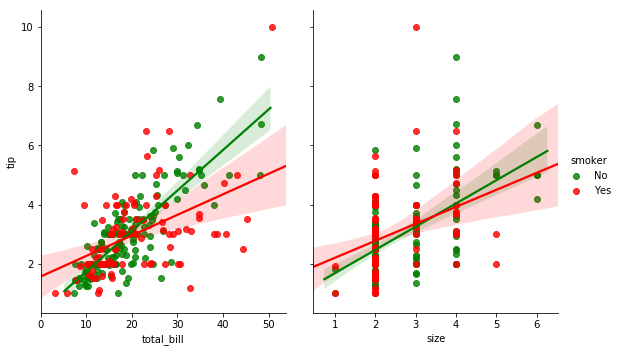

In [85]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"], height=5, aspect=.8, kind="reg", hue="smoker", palette=["g","r"]);

#### By day of week and meal

In [74]:
print(df.groupby(["day"]).agg([np.mean, np.std]).round(2))

     total_bill         tip        size         Tip%       BillPP      
           mean   std  mean   std  mean   std   mean   std   mean   std
day                                                                    
Fri       17.15  8.30  2.73  1.02  2.11  0.57  16.99  4.77   8.13  3.06
Sat       20.44  9.48  2.99  1.63  2.52  0.82  15.32  5.13   8.19  2.92
Sun       21.41  8.83  3.26  1.23  2.84  1.01  16.69  8.47   7.86  3.21
Thur      17.68  7.89  2.77  1.24  2.45  1.07  16.13  3.87   7.42  2.45


Looking at when the dining takes place, dinner on Saturday is the busiest time recorded for this waiter with 87 observations while there is only 1 bill recorded for dinner on Thursday and 7 bills for lunch on Fridays which has the smallest average bill size of 13 dollars. The total_bill amounts range from a minimum value of 3 dollars for a dinner on a Saturday (for a lone diner) to a maximum bill amount of 51 dollars for another Saturday dinner which we saw above was for a male bill payer smoker containing party! This was for a party of 3 people.


#### Total bill and tip amount
I think another variable that could be added would be the tip amount added to the total_bill amount.
I am presuming that total_bill refers to the total food and drinks bill before adding on the tip. However this is not clear in the documentation. The total food and drinks bill could possibly influence the tip amount if the bill-payer was paying by cash for the full amount or adding the tip to the debit or credit card amount. There is no information in this dataset about how the bill was paid. If paying the bill in cash, then rounding might come into play. For example in the very observation in the dataset the total_bill amount is 16.99 and the tip is 1.01 which would bring the total amount paid to 18 dollars while the second customer paid a tip of 1.66 on a 10.34 bill.



In [44]:
# df['total_paid']= df['tip'] + df['total_bill']# new columns for the total amount paid by adding tip to the total_bill amount

The scatter plot shows that there appears to be a relationship between the total bill amount and the tip. There seem to be a line going from the origin on the bottom left of the plot to the top right corner with many observations on the underside of this line. This plot shows a few higher tips for smaller bills but there are many points where the tip is smaller in comparison to the total bill size. I think the standard tipping rate in the US is 15% so maybe the trend in general is following this line. 
Most of the tips seem to be between 1 and 5 dollars and seem to be higher rates for the lower total bills. With a conventional tipping rate of 15% you would expect to see many points around the 1.50 dollar for 10 dollar bill and 3 dollars for a 20 dollar bill and so on but as the total bill size increases the tip rate does not see to rise accordingly for all points. Most total bills seem to be between 10 and 25 dollars. For total bill amounts over 30 dollars, the tip rate does not see to have a clear trend. 

I am using a second plot above to show the actual tip rate against the top meal and there is a clear cluster of points between 10 and 20% for total bill amounts between 10 and 30 dollars and although there are less higher bills the tip rates are far more variable. The horizontal line plotted at 15% is used to show the standard tip rate of 15%. There seems to be slightly more points above this 15% line but most points for the higher bills actually fall under this line which shows that while the average tip rate does seem to follow bill amount for smaller bills, the rate given for higher bills is generally lower than 15%. Also note the tips for higher bill amounts that are under the 15% line are nearly all male smokers.

There is a lot of information in this plot when the additonal variables are shown. It would be better to use facets.



### outliers.
There is one particular observation with a very large tip rate compared to all other tips. This is causing the boxplots to be squashed down. I'm not sure how to fix this as otherwise there would be no need to transform the variable.
I will have a look at this observations here by sorting the dataframe according to the tip size.
This tip relates to row index 172 where a male paid over 5 dollars for a tip on a meal that cost just over 7 dollars!
This was for a dinner for two on a Sunday in the smoking section which is a bit unbelievable anyway at a total bill amount of 7.25! Possibly part of a bill that was already paid ?

>172        7.25  5.15    Male    Yes  Sun  Dinner     2      71.0     True

I will leave this single observation out for the box plot just here using the [drop function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas-dataframe-drop)

The range of tip sizes are broadly similar each day but with higher tips paid on Sundays and more unusual behaviour on Saturdays with several outliers.
There is less variability in the tips paid by females than males with some unusually higher tips paid by males.
Dinner is more lucrative for tips.

### Summary and conclusion

I first looked at some summary statistics of the dataset by looking at the individual variables, how they were distributed. This univariate exploratory data analysis was enhanced by some visualisations which allow us to see trends in the data that might not be so obvious from tables of numbers.
I looked at the central tendancy of the total bill and tip amounts and noted that median bill is lower than the mean bill by about 2 dollars. The mean and median tip amounts differed by about 10 cent. 

(need to look at standard deviation of bill when size is taken into account).

The range of bill amounts was quite large varying from 3.07 to 50.81 dollars. The IQR range is a more robust measure of the spread of the data as it excludes the more extreme values. The boxplots are very useful here as they show the main 5 statistics visually.

The histograms show the distribution of the total bill and tip amounts and both appear to be right skewed.

Par 2 looked at some background on regression and applied this to the total bill and tip amounts. There is a correlation between total bill amount and the tip amount but the plots show the other factors at play. Size of the party was also positively correlated with the tip size.
The coefficient of determination showed that total bill amount only accounts for 46% of the variation in the tip amount.
There also appeared to be some heteroskedascity in the data when using total bill amount to predict the tip amount. 
This suggests non linearity in the dataset.

- Fridays are the quietest days for this waiter. Saturdays are the busiest days followed by Sundays so there are more customers at the weekend. 
- The mosy common party size by far is 2. There are very few lone diners and very few parties of  5 and 6.
- - Sex: There are 157 male bill payers out of 244 observations leaving only 87 female bill-payers.

- Smoker: There a more non-smokers in the dataset with 151 out of the total of 244 observations having only non-smokers in the party while 93 parties include smokers.

- Time: The data includes 176 dinners out of 244 meals wuth the remaining 68 meals being lunches.

- Day: Saturday is the most frequent day in this dataset.

- There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend. (maybe more first dates or just more men out entertaining at the weekends!)
- There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded for Fridays than any other days, these customers are mostly smokers. (perhaps after work?!).
- There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.

Of course this dataset is just for one waiter who may work less hours on a Friday?



***

In [40]:
!ls

Instructions.pdf   README.md          notes.ipynb        tips-project.ipynb
LICENSE            matplotliblogo.png seaborn.png


***
<a id="references"></a>
# References

### The Tips dataset
- [1] Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing.
- [2][Tidy Data by Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf)
- [ ][Experimental Design and Analysis](http://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf) by Howard J. Seltman
-  https://www.statisticshowto.datasciencecentral.com/lowess-smoothing/
# References
- **[Python.org](https://www.python.org/)**  
- **[GitHub guides - Mastering Markdown](https://guides.github.com/features/mastering-markdown/)**  
- **[Project Jupyter](https://jupyter.org/)**  
- **[seaborn.pydata.org](https://seaborn.pydata.org/)**  
- **[tips dataset on Michael Waskon GitHub](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.)**  
- **[The R Datasets](http://vincentarelbundock.github.io/Rdatasets/datasets.html)** - including the tips dataset
- **[seaborn](https://seaborn.pydata.org/introduction.html#introduction)**  
- **[ipython magic commands ](https://ipython.readthedocs.io/en/stable/interactive/magics.html)**  
- <https://jakevdp.github.io/PythonDataScienceHandbook/>
-<http://onlinestatbook.com/2/index.html>
- <https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/>

### Python, GitHub and Jupyter resources
- [python.org](https://docs.python.org/3/library/index.html)
- Python for Data Analysis - Chapter 4 NumPy Basics: Arrays and Vectorised Computation by Wes McKinney
- [Python Data Science Handbook by Jake VanderPlas ](https://jakevdp.github.io/PythonDataScienceHandbook/) 
- [Jake VanderPlas Website](http://vanderplas.com)
- [numpy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html)


- [GitHub Flavoured Markdown](https://github.github.com/gfm/)
- [Jupyter Notebook documentation](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#basic-workflow)
- [Jupyter Notebook Tips, Tricks, and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- [python random docs](https://docs.python.org/3/library/random.html#module-random)
-[LaTeX equations in Jupyter](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations)
- [pythonprogramming.net](https://pythonprogramming.net)

- Jupyter logo.  Cameron Oelsen [BSD (http://opensource.org/licenses/bsd-license.php)]

- [online](http://onlinestatbook.com)
- [LaTeX wiki](https://en.wikibooks.org/wiki/LaTeX/Special_Characters)

[toc](#toc)
***

$\hat{y_i}$ 
$$b_1 = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2} \qquad \textrm{and} \qquad b_0 = \bar{y} - b_1 \bar{x} $$